## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import learning_curve


In [2]:
df = pd.read_excel('Concrete_Data.xls')

# Data Representation

In [3]:
df.head()

Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
0                                      162.0   
1                                      162.0   
2                                      228.0   
3                                      228.0   
4                                      192.0   

   Superplasticizer (component 5)(kg in a m^3 mixture)  \
0                                                2.5     
1                                                2.5     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
0                                             1040.0      
1                                             1055.0      
2                                              932.0      
3                                              932.0      
4                                              978.4      

   Fine Aggregate (component 7)(kg in a m^3 mixture)  Age (day)  \
0                                              676.0         28   
1                                              676.0         28   
2                                              594.0        270   
3                                              594.0        365   
4                                              825.5        360   

   Concrete compressive strength(MPa, megapascals)   
0                                         79.986111  
1                                         61.887366  
2                                         40.269535  
3                                         41.052780  
4                                         44.296075

In [4]:
df.tail()

Cement (component 1)(kg in a m^3 mixture)  \
1025                                      276.4   
1026                                      322.2   
1027                                      148.5   
1028                                      159.1   
1029                                      260.9   

      Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
1025                                              116.0       
1026                                                0.0       
1027                                              139.4       
1028                                              186.7       
1029                                              100.5       

      Fly Ash (component 3)(kg in a m^3 mixture)  \
1025                                        90.3   
1026                                       115.6   
1027                                       108.6   
1028                                         0.0   
1029                                        78.3   

      Water  (component 4)(kg in a m^3 mixture)  \
1025                                      179.6   
1026                                      196.0   
1027                                      192.7   
1028                                      175.6   
1029                                      200.6   

      Superplasticizer (component 5)(kg in a m^3 mixture)  \
1025                                                8.9     
1026                                               10.4     
1027                                                6.1     
1028                                               11.3     
1029                                                8.6     

      Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
1025                                              870.1      
1026                                              817.9      
1027                                              892.4      
1028                                              989.6      
1029                                              864.5      

      Fine Aggregate (component 7)(kg in a m^3 mixture)  Age (day)  \
1025                                              768.3         28   
1026                                              813.4         28   
1027                                              780.0         28   
1028                                              788.9         28   
1029                                              761.5         28   

      Concrete compressive strength(MPa, megapascals)   
1025                                         44.284354  
1026                                         31.178794  
1027                                         23.696601  
1028                                         32.768036  
1029                                         32.401235

In [5]:
df.sample()

Cement (component 1)(kg in a m^3 mixture)  \
409                                     167.35   

     Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
409                                              129.9       

     Fly Ash (component 3)(kg in a m^3 mixture)  \
409                                      128.62   

     Water  (component 4)(kg in a m^3 mixture)  \
409                                     175.46   

     Superplasticizer (component 5)(kg in a m^3 mixture)  \
409                                               7.79     

     Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
409                                             1006.3      

     Fine Aggregate (component 7)(kg in a m^3 mixture)  Age (day)  \
409                                              746.6          3   

     Concrete compressive strength(MPa, megapascals)   
409                                         14.940945

In [6]:
df.sample(5)

Cement (component 1)(kg in a m^3 mixture)  \
474                                     446.00   
804                                     393.00   
304                                     277.05   
986                                     272.80   
123                                     425.00   

     Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
474                                               24.0       
804                                                0.0       
304                                                0.0       
986                                              105.1       
123                                              106.3       

     Fly Ash (component 3)(kg in a m^3 mixture)  \
474                                       79.00   
804                                        0.00   
304                                       97.39   
986                                       81.80   
123                                        0.00   

     Water  (component 4)(kg in a m^3 mixture)  \
474                                      162.0   
804                                      192.0   
304                                      160.6   
986                                      209.7   
123                                      153.5   

     Superplasticizer (component 5)(kg in a m^3 mixture)  \
474                                              10.30     
804                                               0.00     
304                                              11.83     
986                                               9.00     
123                                              16.50     

     Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
474                                              967.0      
804                                              940.0      
304                                              973.9      
986                                              904.0      
123                                              852.1      

     Fine Aggregate (component 7)(kg in a m^3 mixture)  Age (day)  \
474                                             712.00         28   
804                                             758.00         28   
304                                             875.61          3   
986                                             679.70         28   
123                                             887.10         28   

     Concrete compressive strength(MPa, megapascals)   
474                                         53.386127  
804                                         39.582817  
304                                         23.138815  
986                                         37.171030  
123                                         60.294676

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

# Data Wrangling/Cleaning

# Missing Values

In [8]:
df.isna().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

# Dublicated Values

In [9]:
df.duplicated().sum()

25

# Outliers

In [10]:
Q1 = df[['Cement (component 1)(kg in a m^3 mixture)', 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)', 
         'Fly Ash (component 3)(kg in a m^3 mixture)', 'Water  (component 4)(kg in a m^3 mixture)', 
            'Superplasticizer (component 5)(kg in a m^3 mixture)', 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
         'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)']].quantile(0.25)
Q3 = df[['Cement (component 1)(kg in a m^3 mixture)', 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)', 
         'Fly Ash (component 3)(kg in a m^3 mixture)', 'Water  (component 4)(kg in a m^3 mixture)', 
            'Superplasticizer (component 5)(kg in a m^3 mixture)', 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
         'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)']].quantile(0.75)

In [11]:
IQR = Q3 - Q1

In [12]:
IQR

Cement (component 1)(kg in a m^3 mixture)                157.625
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    142.950
Fly Ash (component 3)(kg in a m^3 mixture)               118.270
Water  (component 4)(kg in a m^3 mixture)                 27.100
Superplasticizer (component 5)(kg in a m^3 mixture)       10.160
Coarse Aggregate  (component 6)(kg in a m^3 mixture)      97.400
Fine Aggregate (component 7)(kg in a m^3 mixture)         93.050
Age (day)                                                 49.000
dtype: float64

In [13]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [14]:
outliers = ((df[['Cement (component 1)(kg in a m^3 mixture)', 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)', 
         'Fly Ash (component 3)(kg in a m^3 mixture)', 'Water  (component 4)(kg in a m^3 mixture)', 
            'Superplasticizer (component 5)(kg in a m^3 mixture)', 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
         'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)']] < lower_bound) | 
            (df[['Cement (component 1)(kg in a m^3 mixture)', 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)', 
         'Fly Ash (component 3)(kg in a m^3 mixture)', 'Water  (component 4)(kg in a m^3 mixture)', 
            'Superplasticizer (component 5)(kg in a m^3 mixture)', 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
         'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)']] > upper_bound))

outlier_points = df[outliers.any(axis=1)]
print("Outliers in the dataset:")
print(outlier_points)

Outliers in the dataset:
      Cement (component 1)(kg in a m^3 mixture)  \
2                                         332.5   
3                                         332.5   
4                                         198.6   
6                                         380.0   
12                                        427.5   
...                                         ...   
823                                       322.0   
862                                       140.0   
873                                       237.0   
936                                       236.9   
1019                                      139.7   

      Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
2                                                 142.5       
3                                                 142.5       
4                                                 132.4       
6                                                  95.0       
12                                             

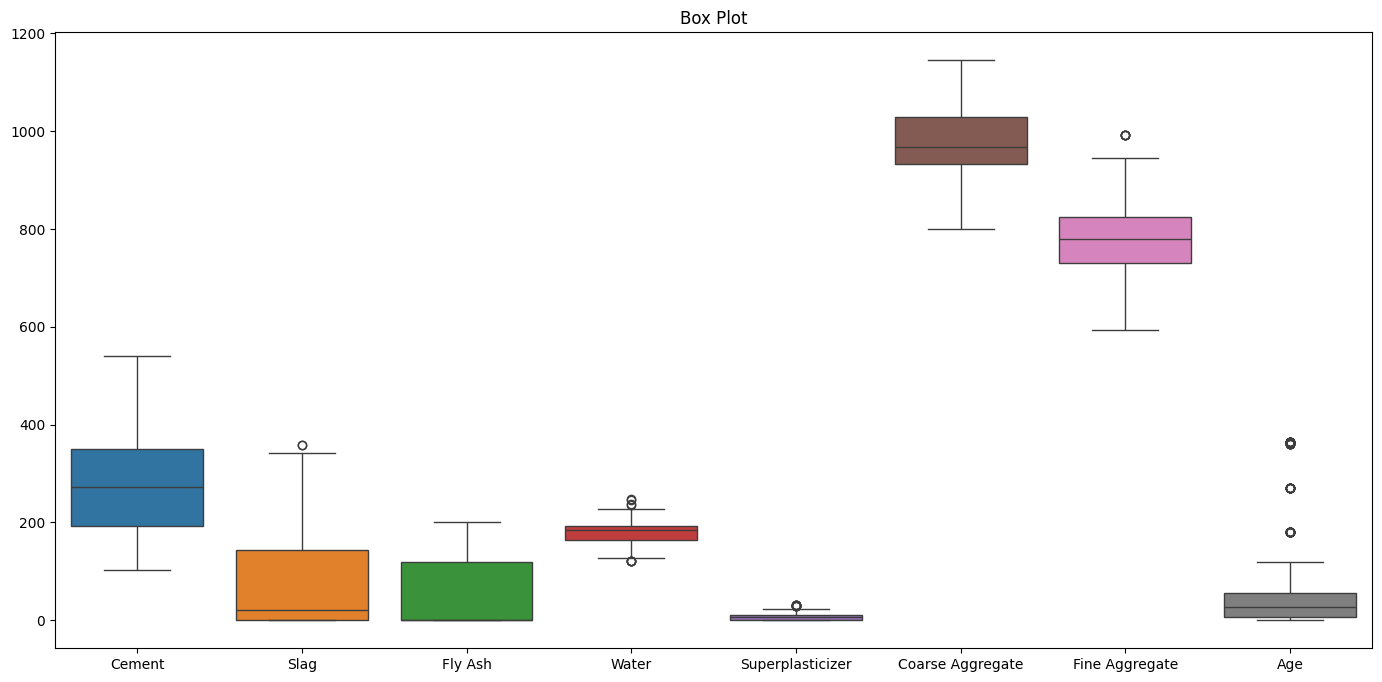

In [15]:
simple_names = {
    'Cement (component 1)(kg in a m^3 mixture)': 'Cement',
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)': 'Slag',
    'Fly Ash (component 3)(kg in a m^3 mixture)': 'Fly Ash',
    'Water  (component 4)(kg in a m^3 mixture)': 'Water',
    'Superplasticizer (component 5)(kg in a m^3 mixture)': 'Superplasticizer',
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)': 'Coarse Aggregate',
    'Fine Aggregate (component 7)(kg in a m^3 mixture)': 'Fine Aggregate',
    'Age (day)': 'Age'
}

plt.figure(figsize=(17, 8))
sns.boxplot(data=df[list(simple_names.keys())].rename(columns=simple_names))
plt.title('Box Plot')
plt.show()


# Exploratory Data Analysis

## Univariate Analysis

In [16]:
df.head()

Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
0                                      162.0   
1                                      162.0   
2                                      228.0   
3                                      228.0   
4                                      192.0   

   Superplasticizer (component 5)(kg in a m^3 mixture)  \
0                                                2.5     
1                                                2.5     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
0                                             1040.0      
1                                             1055.0      
2                                              932.0      
3                                              932.0      
4                                              978.4      

   Fine Aggregate (component 7)(kg in a m^3 mixture)  Age (day)  \
0                                              676.0         28   
1                                              676.0         28   
2                                              594.0        270   
3                                              594.0        365   
4                                              825.5        360   

   Concrete compressive strength(MPa, megapascals)   
0                                         79.986111  
1                                         61.887366  
2                                         40.269535  
3                                         41.052780  
4                                         44.296075

**Categorical and Numerical Feature Separation**

In [17]:
categorical, numerical=[], []

for i in df.columns:
    if df[i].dtype == 'object':
        categorical.append(i)
    else:
        numerical.append(i)

print('There are {} categorical variables'.format(len(categorical)))        
print('The categorical variables are :', categorical, '\n')

print('There are {} numerical variables'.format(len(numerical)))
print('The numerical variables are :', numerical)


There are 0 categorical variables
The categorical variables are : [] 

There are 9 numerical variables
The numerical variables are : ['Cement (component 1)(kg in a m^3 mixture)', 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)', 'Fly Ash (component 3)(kg in a m^3 mixture)', 'Water  (component 4)(kg in a m^3 mixture)', 'Superplasticizer (component 5)(kg in a m^3 mixture)', 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)', 'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)', 'Concrete compressive strength(MPa, megapascals) ']


**Categorical Values**

    There are no categorical variables in this dataset

**Numerical Values**

In [18]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

    Cement (component 1)(kg in a m^3 mixture)

In [19]:
feature = 'Cement (component 1)(kg in a m^3 mixture)'
print(f"--- Univariate Analysis for {feature} ---")

print("\nSummary Statistics:")
print(df[feature].describe())

--- Univariate Analysis for Cement (component 1)(kg in a m^3 mixture) ---

Summary Statistics:
count    1030.000000
mean      281.165631
std       104.507142
min       102.000000
25%       192.375000
50%       272.900000
75%       350.000000
max       540.000000
Name: Cement (component 1)(kg in a m^3 mixture), dtype: float64


In [20]:
print(f"\nSkewness: {skew(df[feature].dropna()):.3f}")
print(f"Kurtosis: {kurtosis(df[feature].dropna(), fisher=True):.3f}")


Skewness: 0.509
Kurtosis: -0.524


Text(0, 0.5, 'Frequency')

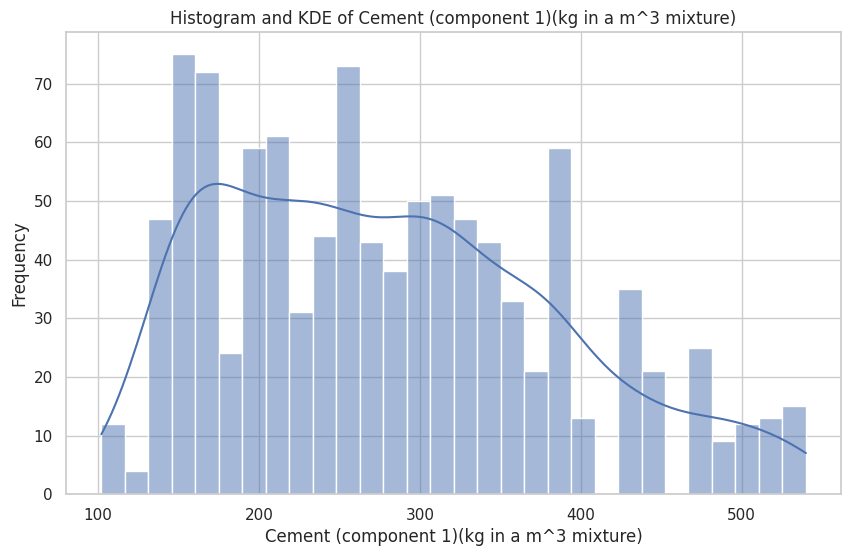

In [21]:
plt.subplot(1, 1, 1)
sns.histplot(df[feature], kde=True, bins=30)
plt.title(f'Histogram and KDE of {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Boxplot of Cement (component 1)(kg in a m^3 mixture)')

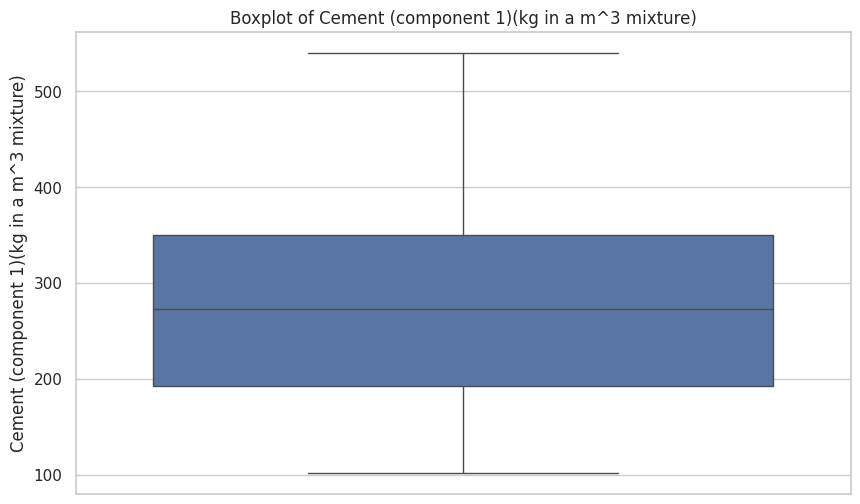

In [22]:
plt.subplot(1, 1, 1)
sns.boxplot(y=df[feature])
plt.title(f'Boxplot of {feature}')

Text(0.5, 1.0, 'Violin Plot of Cement (component 1)(kg in a m^3 mixture)')

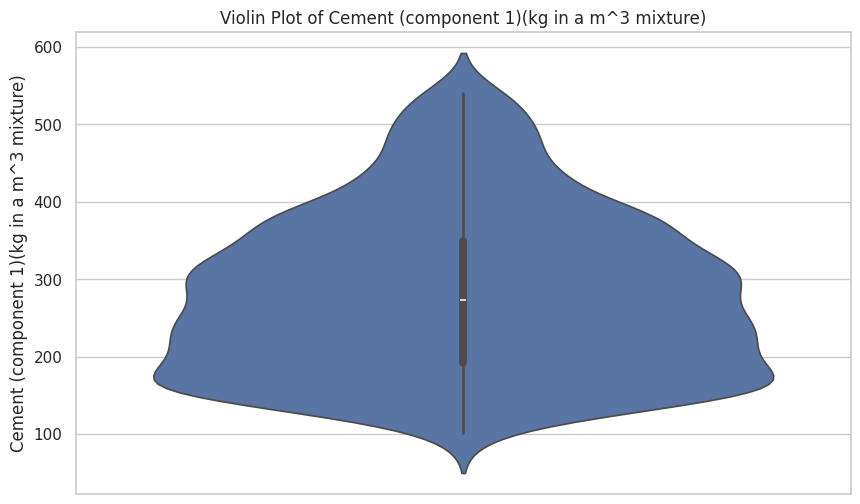

In [23]:
plt.subplot(1, 1,1)
sns.violinplot(y=df[feature])
plt.title(f'Violin Plot of {feature}')

In [24]:
Q1 = df[feature].quantile(0.25)
Q3 = df[feature].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
print(f"\nNumber of outliers (IQR method): {len(outliers)}")
if len(outliers) > 0:
    print(f"Outlier values:\n{outliers.head()}")


Number of outliers (IQR method): 0


    Blast Furnace Slag (component 2)(kg in a m^3 mixture)

In [25]:
feature = 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)'
print(f"--- Univariate Analysis for {feature} ---")

print("\nSummary Statistics:")
print(df[feature].describe())

--- Univariate Analysis for Blast Furnace Slag (component 2)(kg in a m^3 mixture) ---

Summary Statistics:
count    1030.000000
mean       73.895485
std        86.279104
min         0.000000
25%         0.000000
50%        22.000000
75%       142.950000
max       359.400000
Name: Blast Furnace Slag (component 2)(kg in a m^3 mixture), dtype: float64


In [26]:
print(f"\nSkewness: {skew(df[feature].dropna()):.3f}")
print(f"Kurtosis: {kurtosis(df[feature].dropna(), fisher=True):.3f}")


Skewness: 0.800
Kurtosis: -0.511


Text(0, 0.5, 'Frequency')

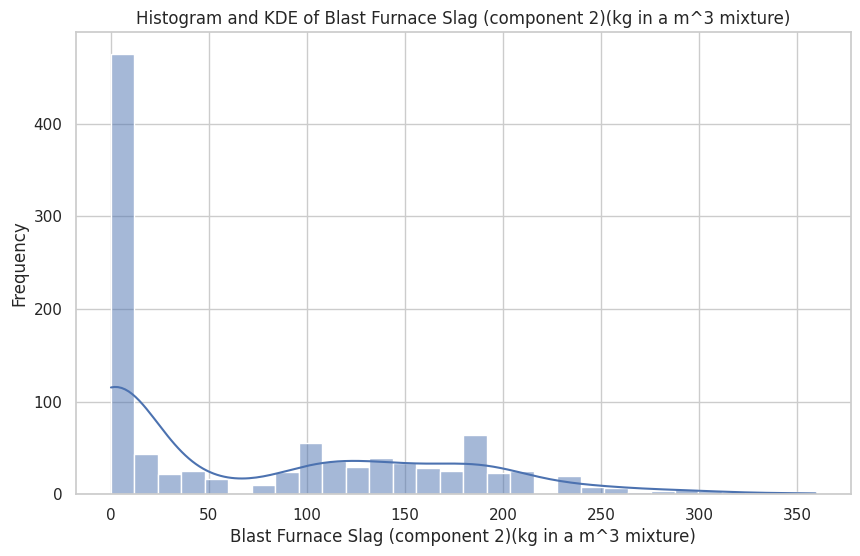

In [27]:
plt.subplot(1, 1, 1)
sns.histplot(df[feature], kde=True, bins=30)
plt.title(f'Histogram and KDE of {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Boxplot of Blast Furnace Slag (component 2)(kg in a m^3 mixture)')

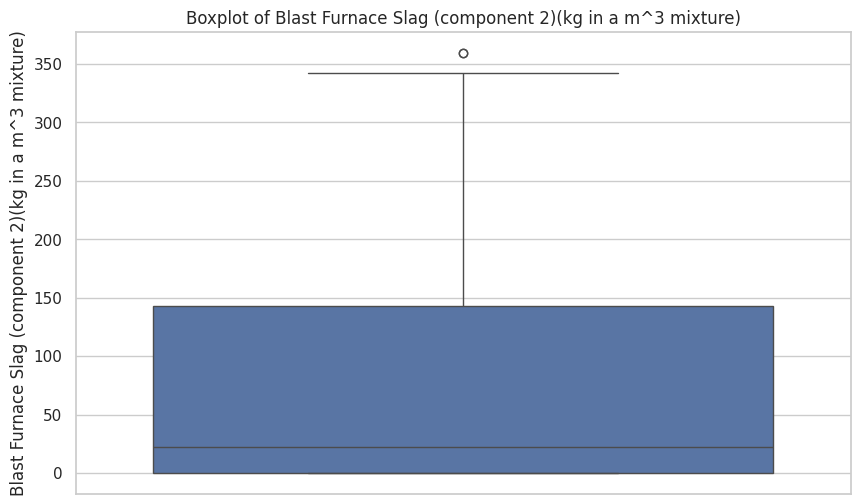

In [28]:
plt.subplot(1, 1, 1)
sns.boxplot(y=df[feature])
plt.title(f'Boxplot of {feature}')

Text(0.5, 1.0, 'Violin Plot of Blast Furnace Slag (component 2)(kg in a m^3 mixture)')

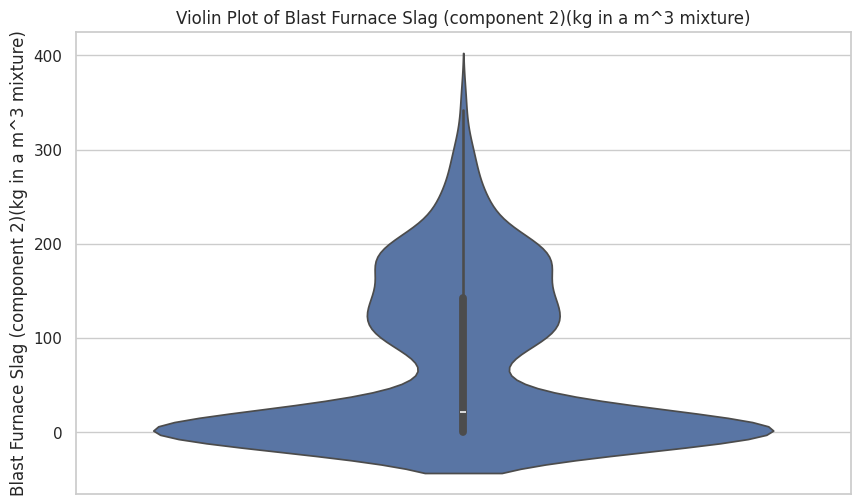

In [29]:
plt.subplot(1, 1, 1)
sns.violinplot(y=df[feature])
plt.title(f'Violin Plot of {feature}')

In [30]:
Q1 = df[feature].quantile(0.25)
Q3 = df[feature].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
print(f"\nNumber of outliers (IQR method): {len(outliers)}")
if len(outliers) > 0:
    print(f"Outlier values:\n{outliers.head()}")


Number of outliers (IQR method): 2
Outlier values:
553    359.4
559    359.4
Name: Blast Furnace Slag (component 2)(kg in a m^3 mixture), dtype: float64


    Fly Ash (component 3)(kg in a m^3 mixture)

--- Univariate Analysis for Fly Ash (component 3)(kg in a m^3 mixture) ---

Summary Statistics:
count    1030.000000
mean       54.187136
std        63.996469
min         0.000000
25%         0.000000
50%         0.000000
75%       118.270000
max       200.100000
Name: Fly Ash (component 3)(kg in a m^3 mixture), dtype: float64

Skewness: 0.537
Kurtosis: -1.328


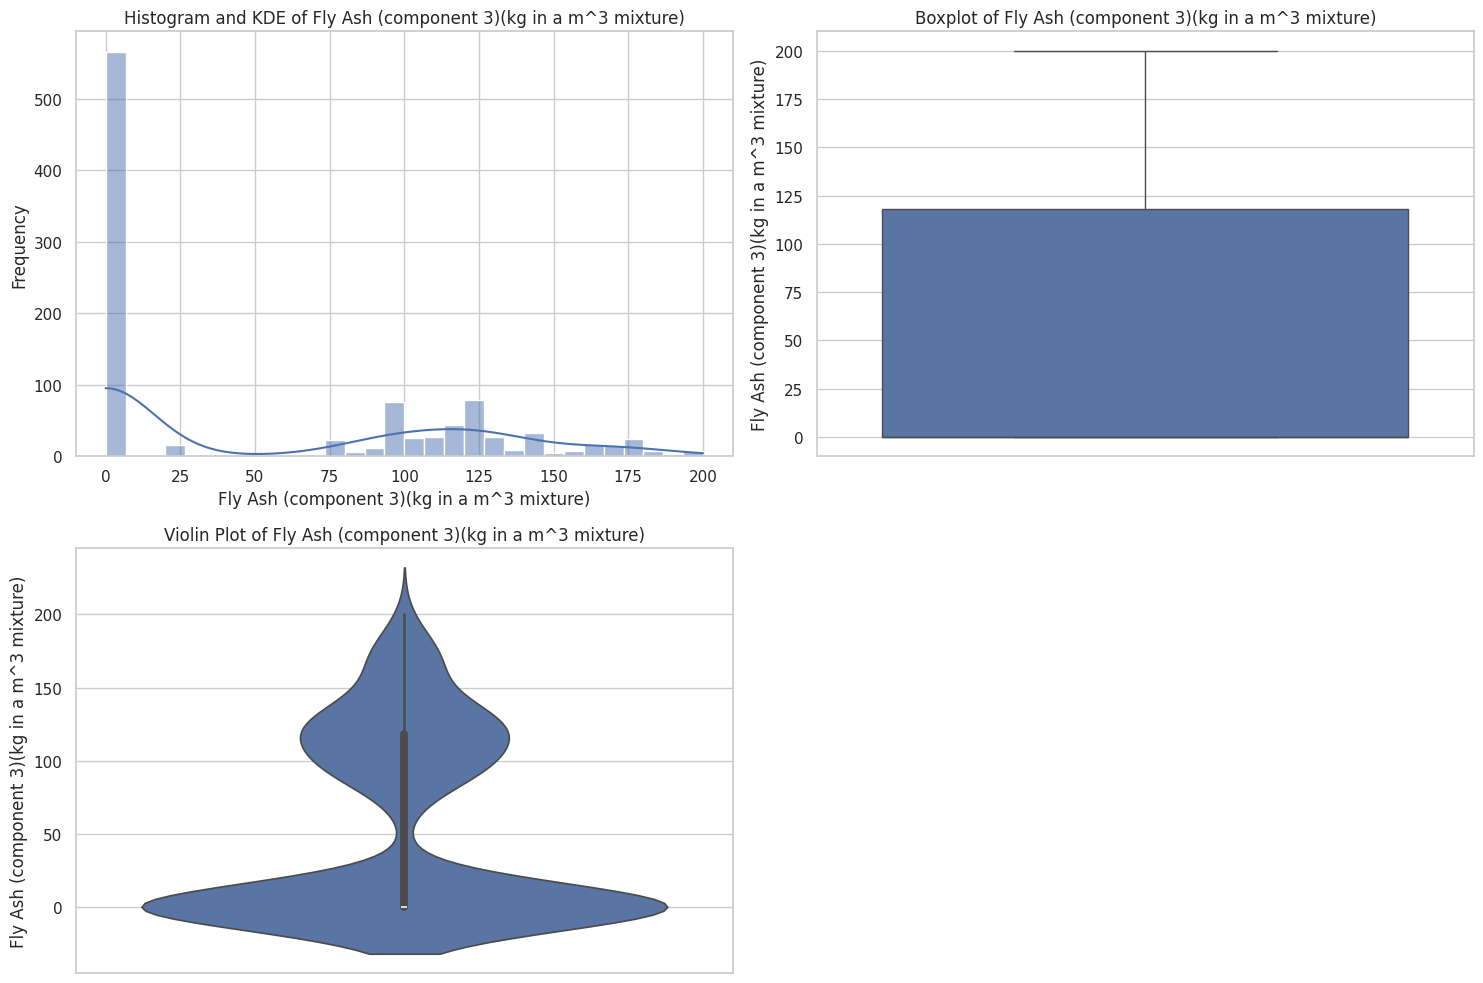


Number of outliers (IQR method): 0


In [31]:
feature = 'Fly Ash (component 3)(kg in a m^3 mixture)'
print(f"--- Univariate Analysis for {feature} ---")

# Summary Statistics
print("\nSummary Statistics:")
print(df[feature].describe())

print(f"\nSkewness: {skew(df[feature].dropna()):.3f}")
print(f"Kurtosis: {kurtosis(df[feature].dropna(), fisher=True):.3f}")

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(df[feature], kde=True, bins=30)
plt.title(f'Histogram and KDE of {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
sns.boxplot(y=df[feature])
plt.title(f'Boxplot of {feature}')

plt.subplot(2, 2, 3)
sns.violinplot(y=df[feature])
plt.title(f'Violin Plot of {feature}')

plt.tight_layout()
plt.show()

Q1 = df[feature].quantile(0.25)
Q3 = df[feature].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
print(f"\nNumber of outliers (IQR method): {len(outliers)}")
if len(outliers) > 0:
    print(f"Outlier values:\n{outliers.head()}")

    Water  (component 4)(kg in a m^3 mixture)

--- Univariate Analysis for Water  (component 4)(kg in a m^3 mixture) ---

Summary Statistics:
count    1030.000000
mean      181.566359
std        21.355567
min       121.750000
25%       164.900000
50%       185.000000
75%       192.000000
max       247.000000
Name: Water  (component 4)(kg in a m^3 mixture), dtype: float64

Skewness: 0.074
Kurtosis: 0.116


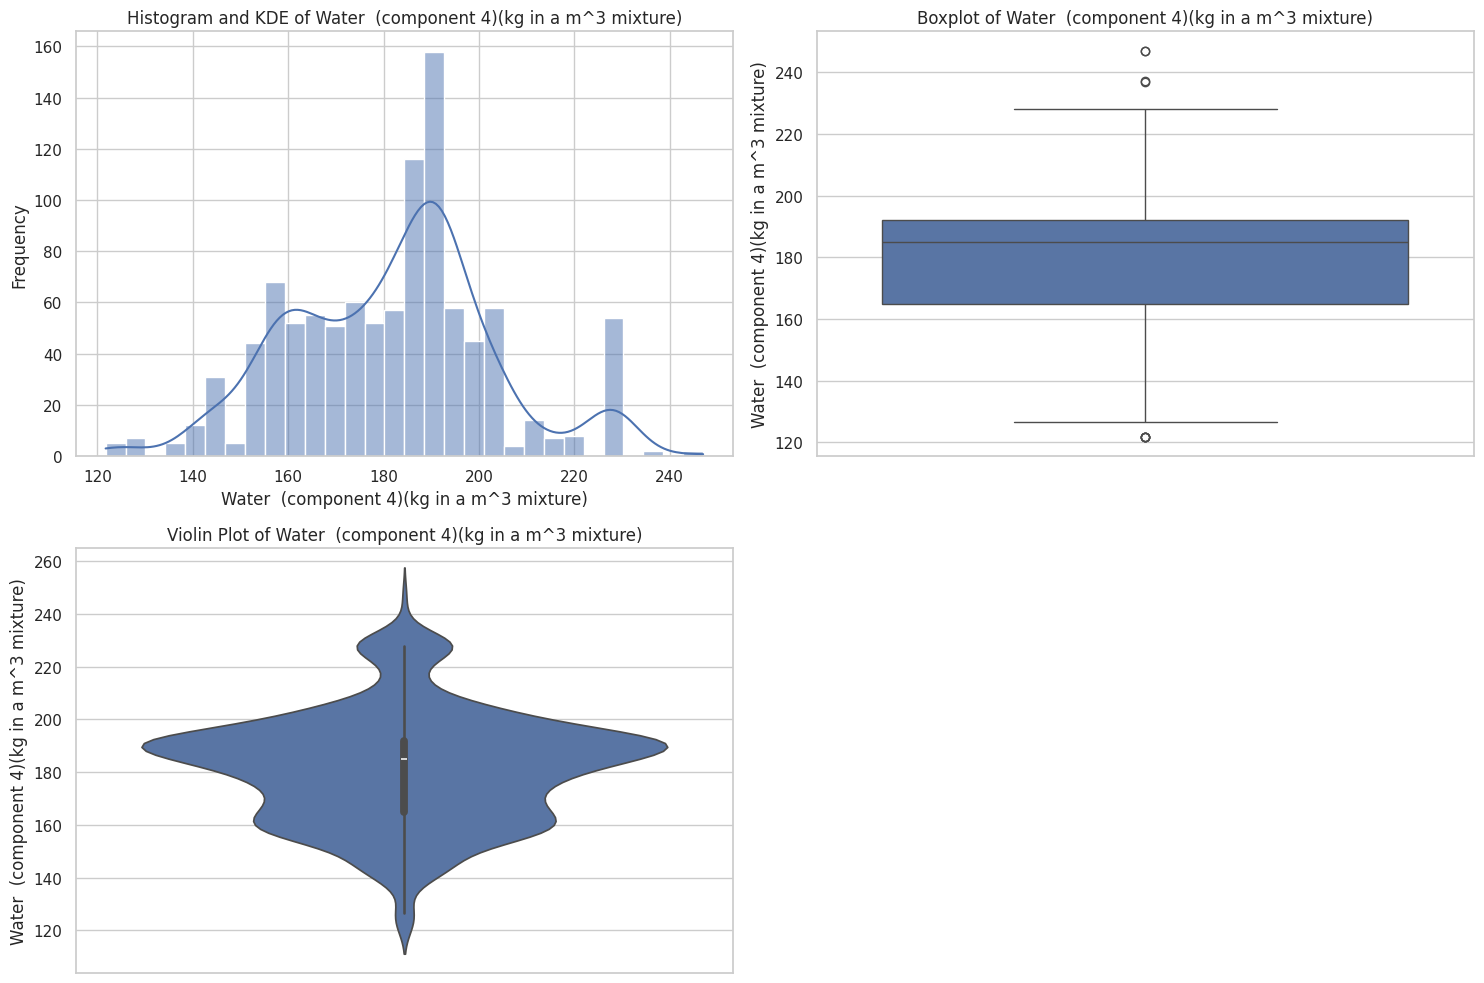


Number of outliers (IQR method): 9
Outlier values:
224    121.75
225    121.75
226    121.75
227    121.75
228    121.75
Name: Water  (component 4)(kg in a m^3 mixture), dtype: float64


In [32]:
feature = 'Water  (component 4)(kg in a m^3 mixture)'
print(f"--- Univariate Analysis for {feature} ---")

# Summary Statistics
print("\nSummary Statistics:")
print(df[feature].describe())

# Skewness and Kurtosis
print(f"\nSkewness: {skew(df[feature].dropna()):.3f}")
print(f"Kurtosis: {kurtosis(df[feature].dropna(), fisher=True):.3f}")

# Visualizations
plt.figure(figsize=(15, 10))

# Histogram with KDE
plt.subplot(2, 2, 1)
sns.histplot(df[feature], kde=True, bins=30)
plt.title(f'Histogram and KDE of {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')

# Boxplot
plt.subplot(2, 2, 2)
sns.boxplot(y=df[feature])
plt.title(f'Boxplot of {feature}')

# Violin Plot
plt.subplot(2, 2, 3)
sns.violinplot(y=df[feature])
plt.title(f'Violin Plot of {feature}')

plt.tight_layout()
plt.show()

# Outlier Detection (IQR method)
Q1 = df[feature].quantile(0.25)
Q3 = df[feature].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
print(f"\nNumber of outliers (IQR method): {len(outliers)}")
if len(outliers) > 0:
    print(f"Outlier values:\n{outliers.head()}")

    Superplasticizer (component 5)(kg in a m^3 mixture)'

--- Univariate Analysis for Superplasticizer (component 5)(kg in a m^3 mixture) ---

Summary Statistics:
count    1030.000000
mean        6.203112
std         5.973492
min         0.000000
25%         0.000000
50%         6.350000
75%        10.160000
max        32.200000
Name: Superplasticizer (component 5)(kg in a m^3 mixture), dtype: float64

Skewness: 0.907
Kurtosis: 1.401


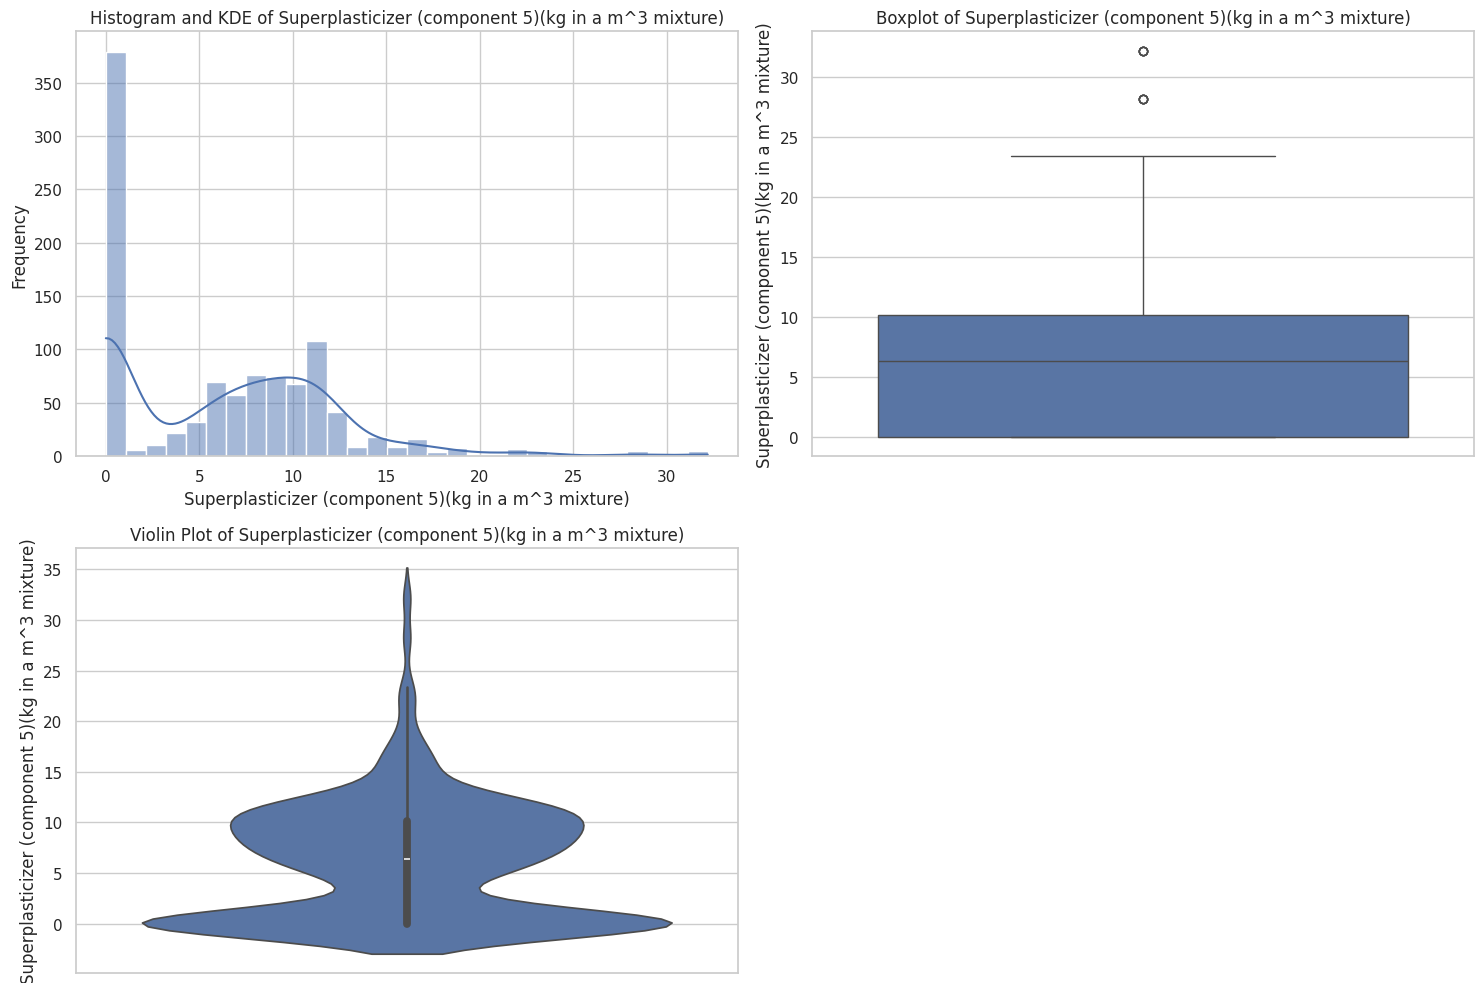


Number of outliers (IQR method): 10
Outlier values:
76     32.2
79     28.2
99     32.2
102    28.2
122    32.2
Name: Superplasticizer (component 5)(kg in a m^3 mixture), dtype: float64


In [33]:
feature = 'Superplasticizer (component 5)(kg in a m^3 mixture)'
print(f"--- Univariate Analysis for {feature} ---")

# Summary Statistics
print("\nSummary Statistics:")
print(df[feature].describe())

# Skewness and Kurtosis
print(f"\nSkewness: {skew(df[feature].dropna()):.3f}")
print(f"Kurtosis: {kurtosis(df[feature].dropna(), fisher=True):.3f}")

# Visualizations
plt.figure(figsize=(15, 10))

# Histogram with KDE
plt.subplot(2, 2, 1)
sns.histplot(df[feature], kde=True, bins=30)
plt.title(f'Histogram and KDE of {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')

# Boxplot
plt.subplot(2, 2, 2)
sns.boxplot(y=df[feature])
plt.title(f'Boxplot of {feature}')

# Violin Plot
plt.subplot(2, 2, 3)
sns.violinplot(y=df[feature])
plt.title(f'Violin Plot of {feature}')

plt.tight_layout()
plt.show()

# Outlier Detection (IQR method)
Q1 = df[feature].quantile(0.25)
Q3 = df[feature].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
print(f"\nNumber of outliers (IQR method): {len(outliers)}")
if len(outliers) > 0:
    print(f"Outlier values:\n{outliers.head()}")

    Coarse Aggregate  (component 6)(kg in a m^3 mixture)

--- Univariate Analysis for Coarse Aggregate  (component 6)(kg in a m^3 mixture) ---

Summary Statistics:
count    1030.000000
mean      972.918592
std        77.753818
min       801.000000
25%       932.000000
50%       968.000000
75%      1029.400000
max      1145.000000
Name: Coarse Aggregate  (component 6)(kg in a m^3 mixture), dtype: float64

Skewness: -0.040
Kurtosis: -0.602


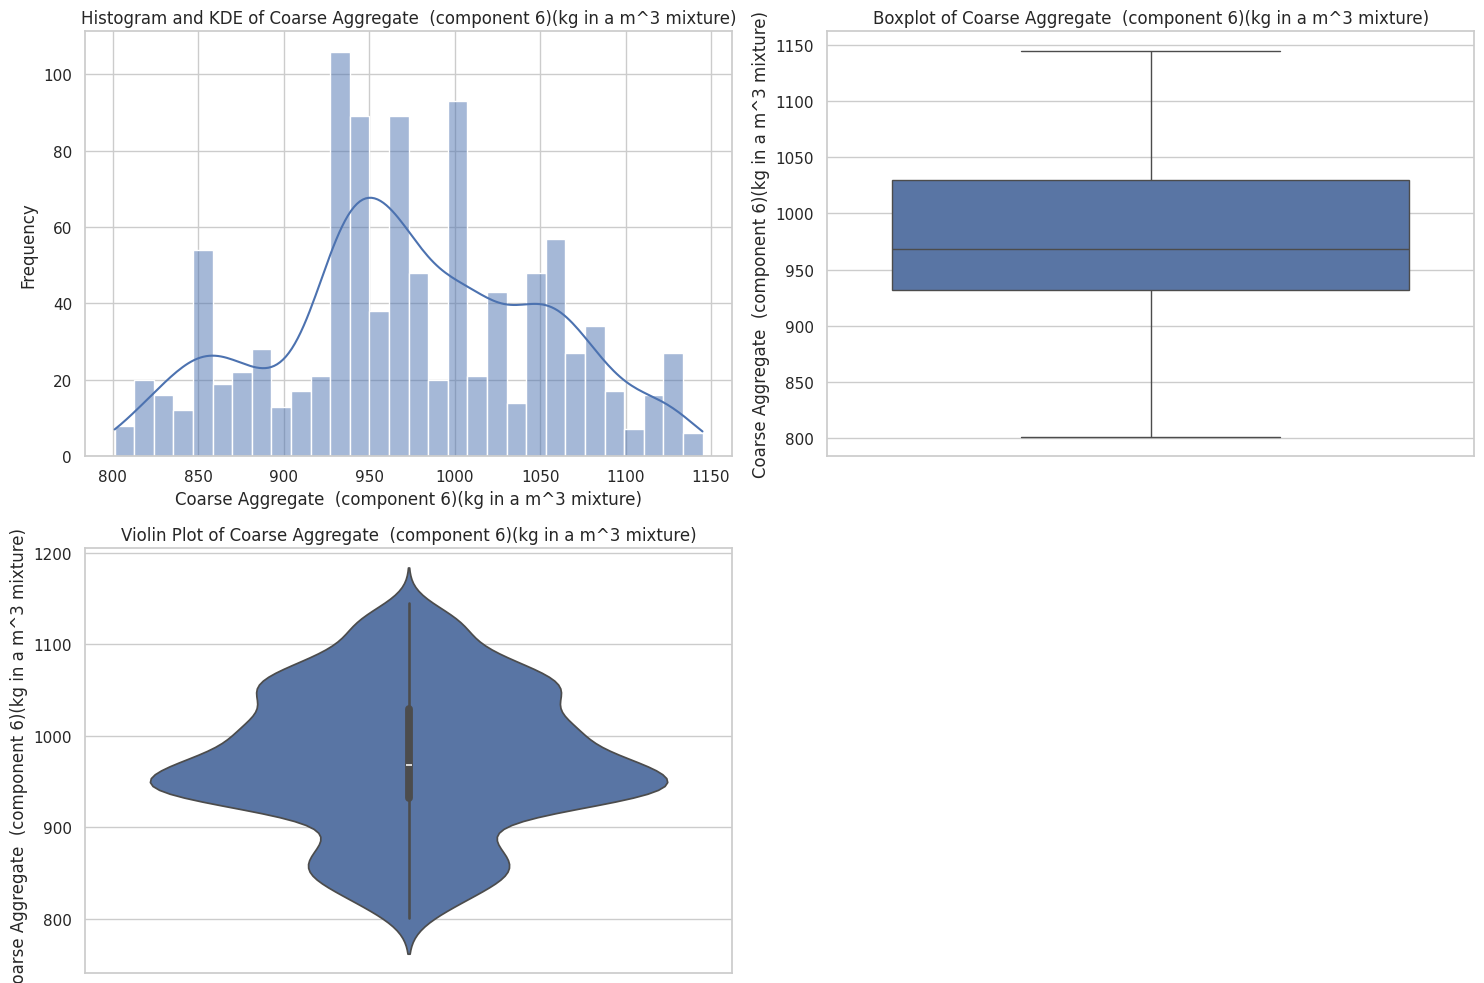


Number of outliers (IQR method): 0


In [34]:
feature = 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)'
print(f"--- Univariate Analysis for {feature} ---")

# Summary Statistics
print("\nSummary Statistics:")
print(df[feature].describe())

# Skewness and Kurtosis
print(f"\nSkewness: {skew(df[feature].dropna()):.3f}")
print(f"Kurtosis: {kurtosis(df[feature].dropna(), fisher=True):.3f}")

# Visualizations
plt.figure(figsize=(15, 10))

# Histogram with KDE
plt.subplot(2, 2, 1)
sns.histplot(df[feature], kde=True, bins=30)
plt.title(f'Histogram and KDE of {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')

# Boxplot
plt.subplot(2, 2, 2)
sns.boxplot(y=df[feature])
plt.title(f'Boxplot of {feature}')

# Violin Plot
plt.subplot(2, 2, 3)
sns.violinplot(y=df[feature])
plt.title(f'Violin Plot of {feature}')

plt.tight_layout()
plt.show()

# Outlier Detection (IQR method)
Q1 = df[feature].quantile(0.25)
Q3 = df[feature].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
print(f"\nNumber of outliers (IQR method): {len(outliers)}")
if len(outliers) > 0:
    print(f"Outlier values:\n{outliers.head()}")

    Fine Aggregate (component 7)(kg in a m^3 mixture)

--- Univariate Analysis for Fine Aggregate (component 7)(kg in a m^3 mixture) ---

Summary Statistics:
count    1030.000000
mean      773.578883
std        80.175427
min       594.000000
25%       730.950000
50%       779.510000
75%       824.000000
max       992.600000
Name: Fine Aggregate (component 7)(kg in a m^3 mixture), dtype: float64

Skewness: -0.253
Kurtosis: -0.107


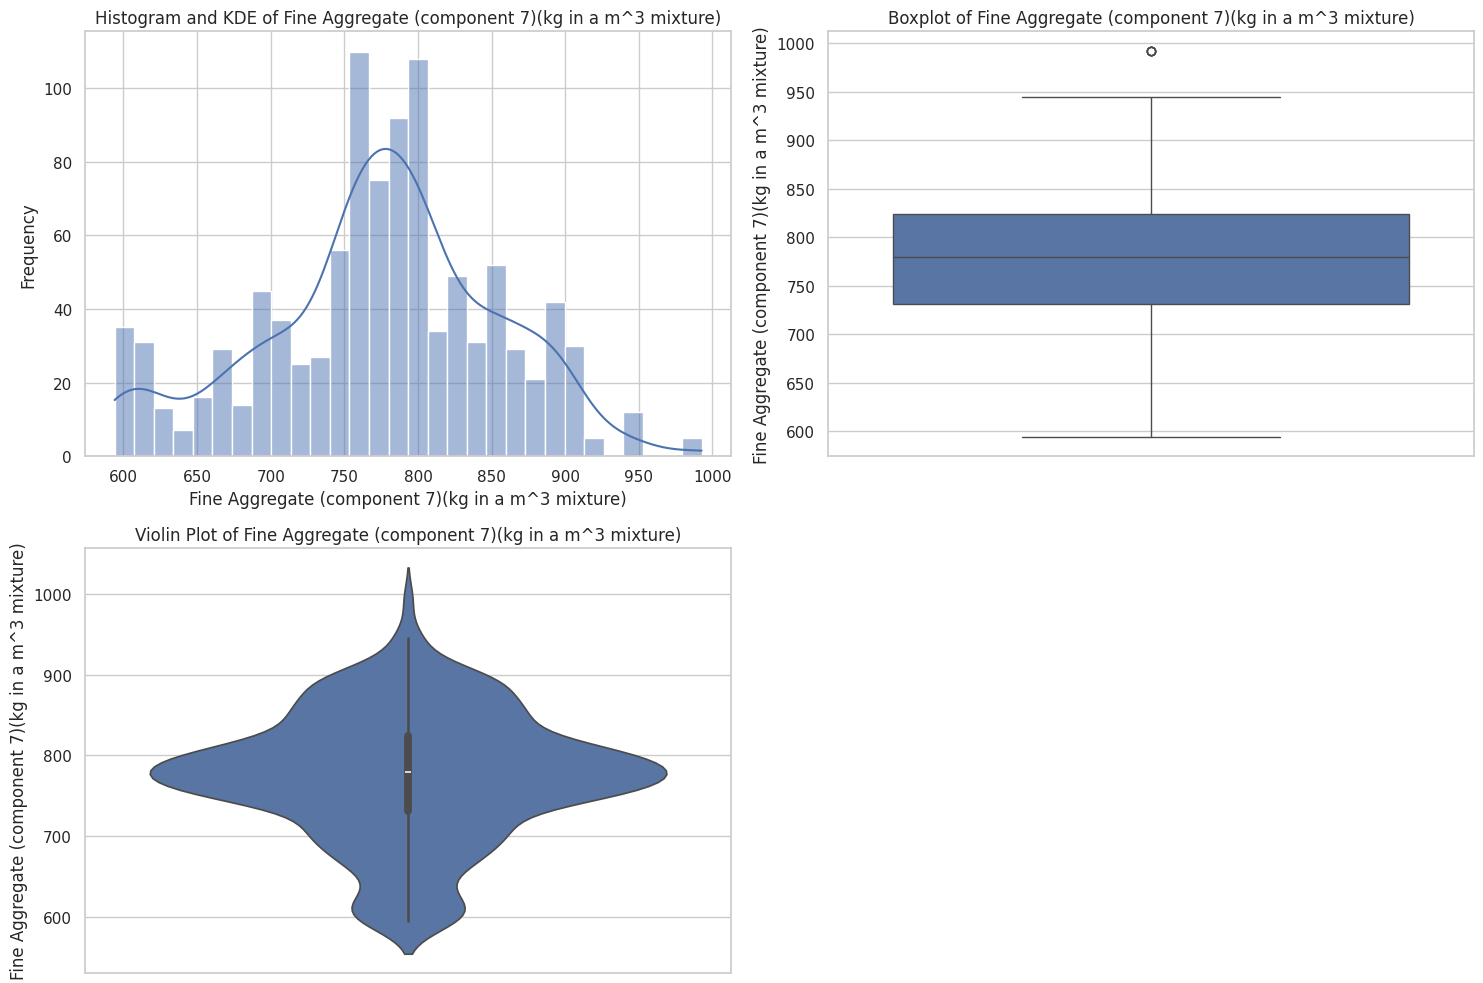


Number of outliers (IQR method): 5
Outlier values:
74     992.6
97     992.6
120    992.6
143    992.6
166    992.6
Name: Fine Aggregate (component 7)(kg in a m^3 mixture), dtype: float64


In [35]:
feature = 'Fine Aggregate (component 7)(kg in a m^3 mixture)'
print(f"--- Univariate Analysis for {feature} ---")

# Summary Statistics
print("\nSummary Statistics:")
print(df[feature].describe())

# Skewness and Kurtosis
print(f"\nSkewness: {skew(df[feature].dropna()):.3f}")
print(f"Kurtosis: {kurtosis(df[feature].dropna(), fisher=True):.3f}")

# Visualizations
plt.figure(figsize=(15, 10))

# Histogram with KDE
plt.subplot(2, 2, 1)
sns.histplot(df[feature], kde=True, bins=30)
plt.title(f'Histogram and KDE of {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')

# Boxplot
plt.subplot(2, 2, 2)
sns.boxplot(y=df[feature])
plt.title(f'Boxplot of {feature}')

# Violin Plot
plt.subplot(2, 2, 3)
sns.violinplot(y=df[feature])
plt.title(f'Violin Plot of {feature}')

plt.tight_layout()
plt.show()

# Outlier Detection (IQR method)
Q1 = df[feature].quantile(0.25)
Q3 = df[feature].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
print(f"\nNumber of outliers (IQR method): {len(outliers)}")
if len(outliers) > 0:
    print(f"Outlier values:\n{outliers.head()}")

    'Age (day)'

--- Univariate Analysis for Age (day) ---

Summary Statistics:
count    1030.000000
mean       45.662136
std        63.169912
min         1.000000
25%         7.000000
50%        28.000000
75%        56.000000
max       365.000000
Name: Age (day), dtype: float64

Skewness: 3.264
Kurtosis: 12.104

Top 10 Value Counts:
Age (day)
28     425
3      134
7      126
56      91
14      62
90      54
100     52
180     26
91      22
365     14
Name: count, dtype: int64


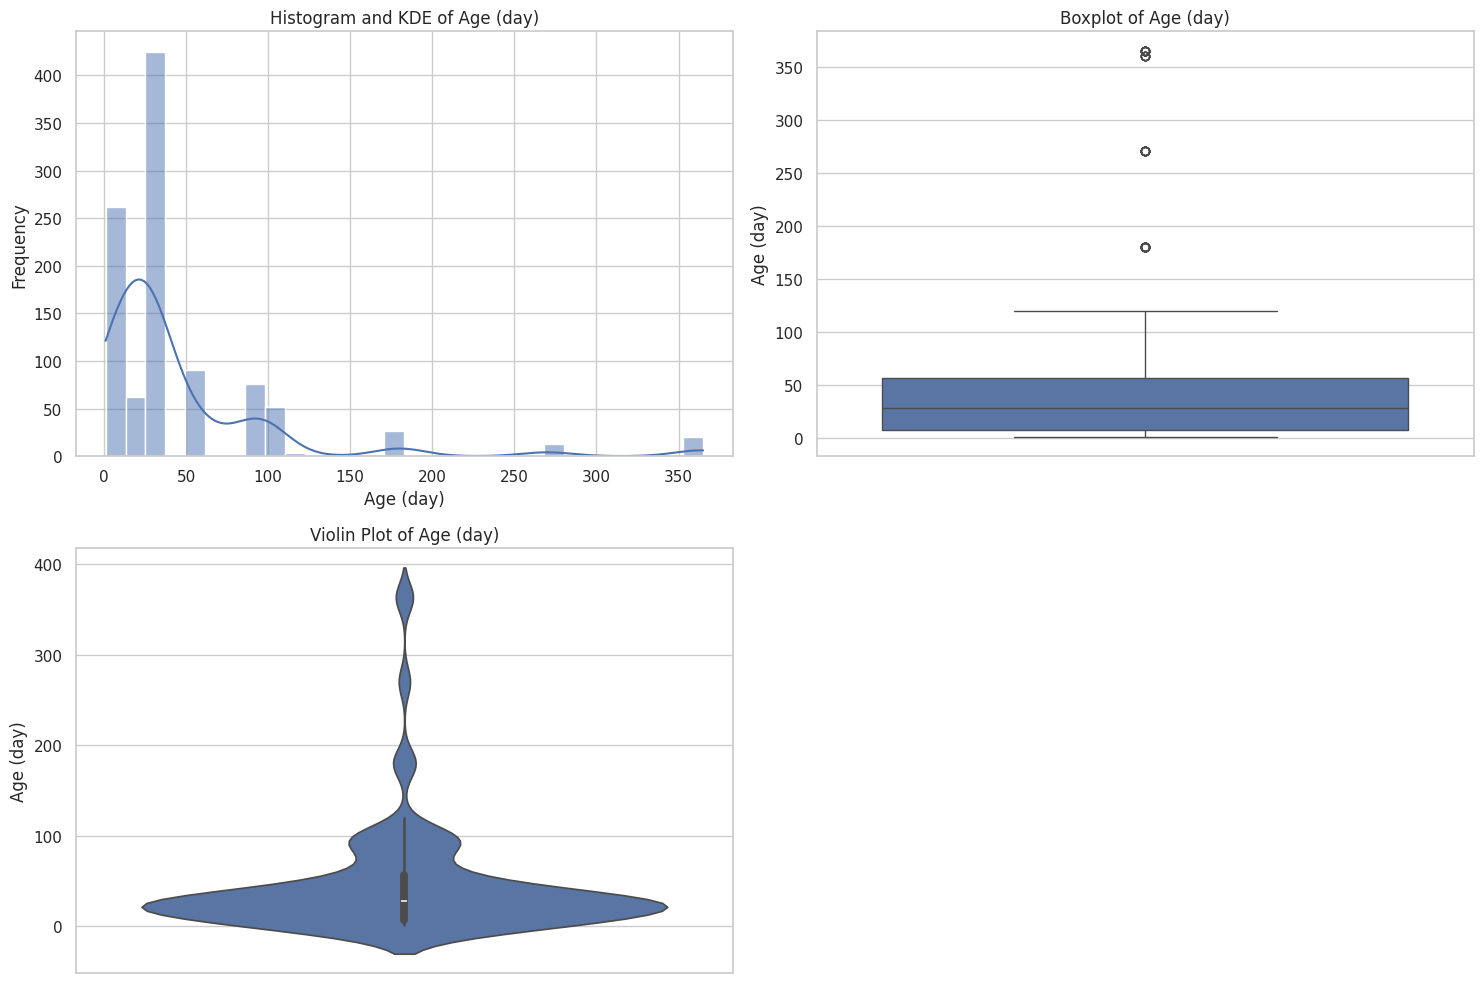


Number of outliers (IQR method): 59
Outlier values:
2     270
3     365
4     360
6     365
12    270
Name: Age (day), dtype: int64


In [36]:
feature = 'Age (day)'
print(f"--- Univariate Analysis for {feature} ---")

# Summary Statistics
print("\nSummary Statistics:")
print(df[feature].describe())

# Skewness and Kurtosis
print(f"\nSkewness: {skew(df[feature].dropna()):.3f}")
print(f"Kurtosis: {kurtosis(df[feature].dropna(), fisher=True):.3f}")

# Value Counts (since Age may be discrete)
print("\nTop 10 Value Counts:")
print(df[feature].value_counts().head(10))

# Visualizations
plt.figure(figsize=(15, 10))

# Histogram with KDE
plt.subplot(2, 2, 1)
sns.histplot(df[feature], kde=True, bins=30)
plt.title(f'Histogram and KDE of {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')

# Boxplot
plt.subplot(2, 2, 2)
sns.boxplot(y=df[feature])
plt.title(f'Boxplot of {feature}')

# Violin Plot
plt.subplot(2, 2, 3)
sns.violinplot(y=df[feature])
plt.title(f'Violin Plot of {feature}')

plt.tight_layout()
plt.show()

# Outlier Detection (IQR method)
Q1 = df[feature].quantile(0.25)
Q3 = df[feature].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
print(f"\nNumber of outliers (IQR method): {len(outliers)}")
if len(outliers) > 0:
    print(f"Outlier values:\n{outliers.head()}")

    Concrete compressive strength(MPa, megapascals)

--- Univariate Analysis for Concrete compressive strength(MPa, megapascals)  ---

Summary Statistics:
count    1030.000000
mean       35.817836
std        16.705679
min         2.331808
25%        23.707115
50%        34.442774
75%        46.136287
max        82.599225
Name: Concrete compressive strength(MPa, megapascals) , dtype: float64

Skewness: 0.416
Kurtosis: -0.318


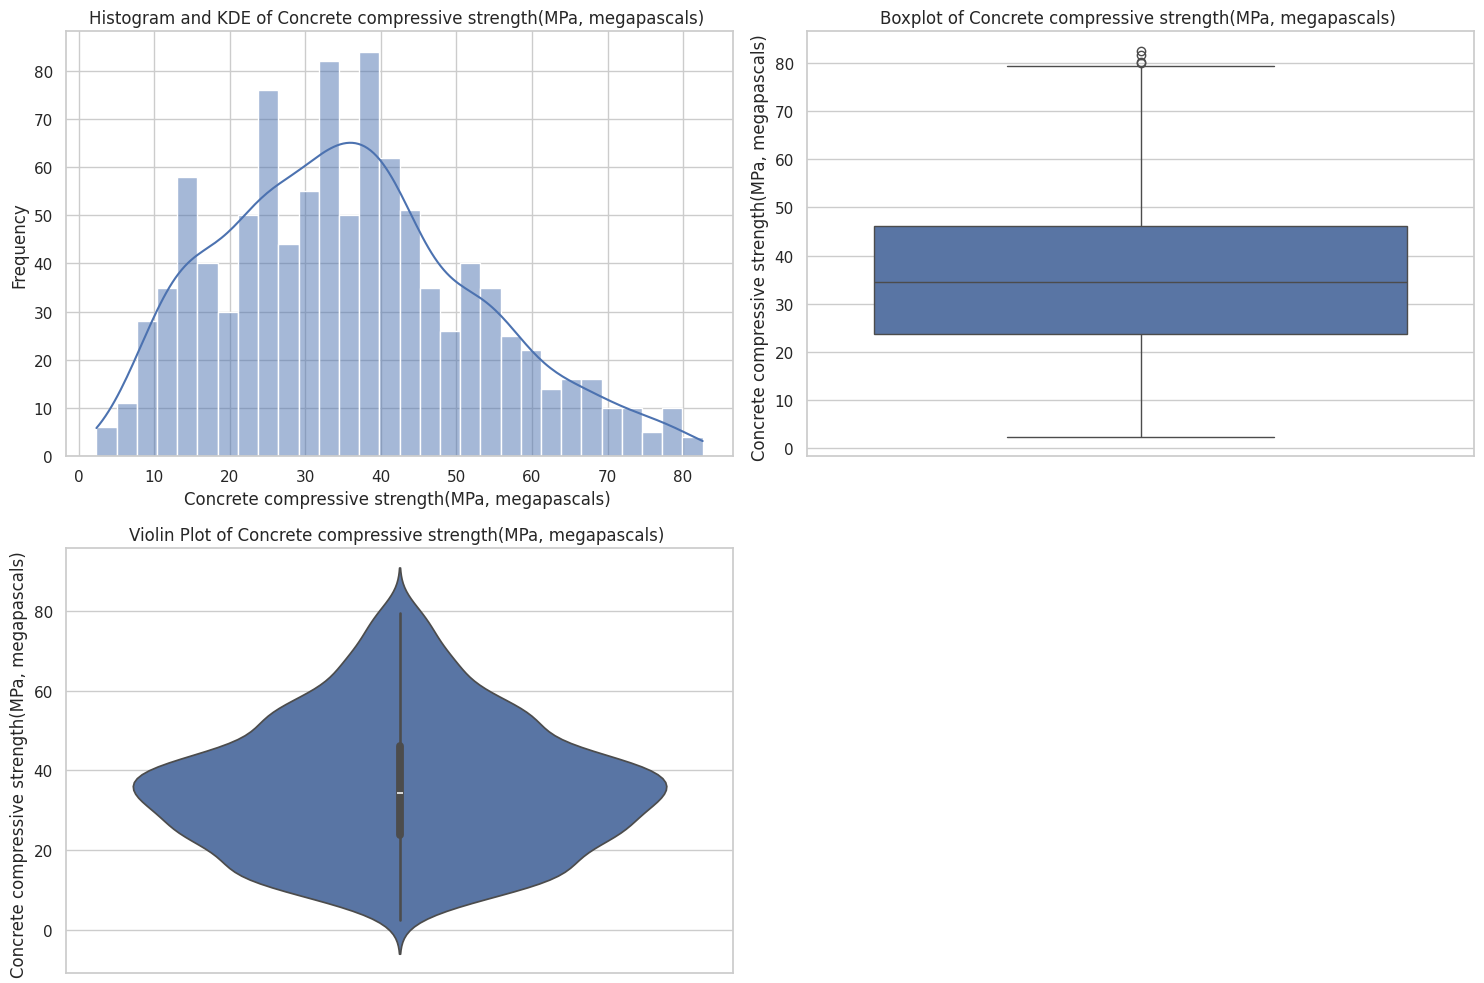


Number of outliers (IQR method): 4
Outlier values:
0      79.986111
153    80.199848
181    82.599225
381    81.751169
Name: Concrete compressive strength(MPa, megapascals) , dtype: float64


In [37]:
feature = 'Concrete compressive strength(MPa, megapascals) '
print(f"--- Univariate Analysis for {feature} ---")

# Summary Statistics
print("\nSummary Statistics:")
print(df[feature].describe())

# Skewness and Kurtosis
print(f"\nSkewness: {skew(df[feature].dropna()):.3f}")
print(f"Kurtosis: {kurtosis(df[feature].dropna(), fisher=True):.3f}")

# Visualizations
plt.figure(figsize=(15, 10))

# Histogram with KDE
plt.subplot(2, 2, 1)
sns.histplot(df[feature], kde=True, bins=30)
plt.title(f'Histogram and KDE of {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')

# Boxplot
plt.subplot(2, 2, 2)
sns.boxplot(y=df[feature])
plt.title(f'Boxplot of {feature}')

# Violin Plot
plt.subplot(2, 2, 3)
sns.violinplot(y=df[feature])
plt.title(f'Violin Plot of {feature}')

plt.tight_layout()
plt.show()

# Outlier Detection (IQR method)
Q1 = df[feature].quantile(0.25)
Q3 = df[feature].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
print(f"\nNumber of outliers (IQR method): {len(outliers)}")
if len(outliers) > 0:
    print(f"Outlier values:\n{outliers.head()}")

## Bivariate Analysis

In [38]:
df.head()

Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
0                                      162.0   
1                                      162.0   
2                                      228.0   
3                                      228.0   
4                                      192.0   

   Superplasticizer (component 5)(kg in a m^3 mixture)  \
0                                                2.5     
1                                                2.5     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
0                                             1040.0      
1                                             1055.0      
2                                              932.0      
3                                              932.0      
4                                              978.4      

   Fine Aggregate (component 7)(kg in a m^3 mixture)  Age (day)  \
0                                              676.0         28   
1                                              676.0         28   
2                                              594.0        270   
3                                              594.0        365   
4                                              825.5        360   

   Concrete compressive strength(MPa, megapascals)   
0                                         79.986111  
1                                         61.887366  
2                                         40.269535  
3                                         41.052780  
4                                         44.296075

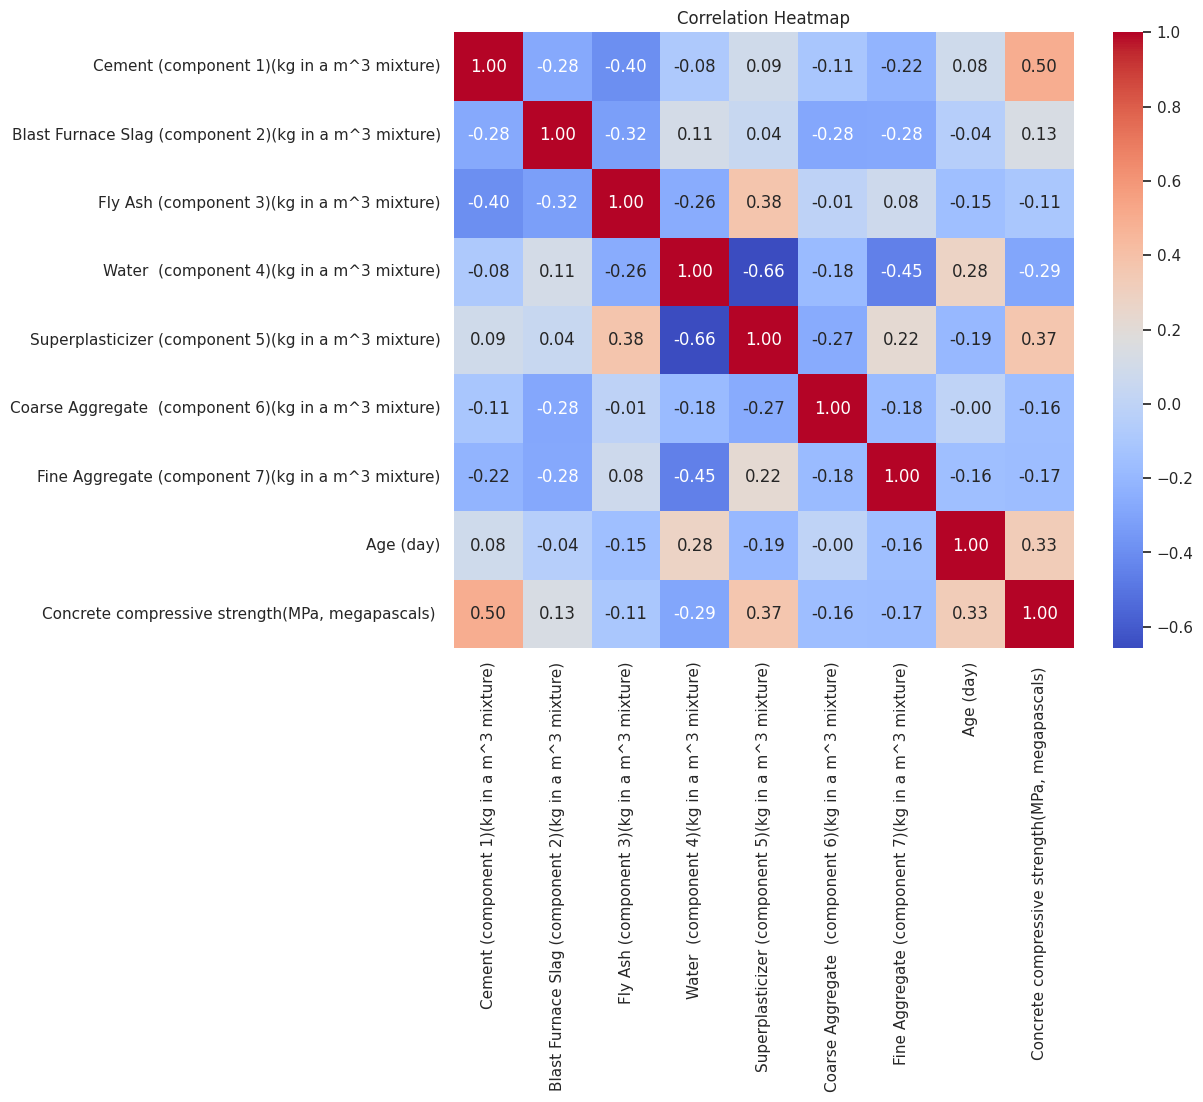

In [39]:
corr_matrix = df.corr()

# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


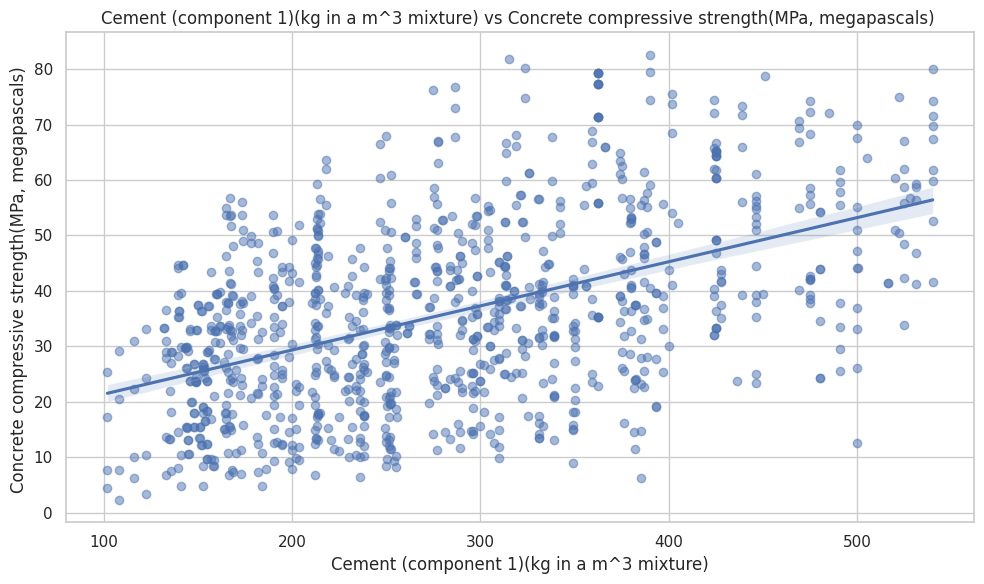

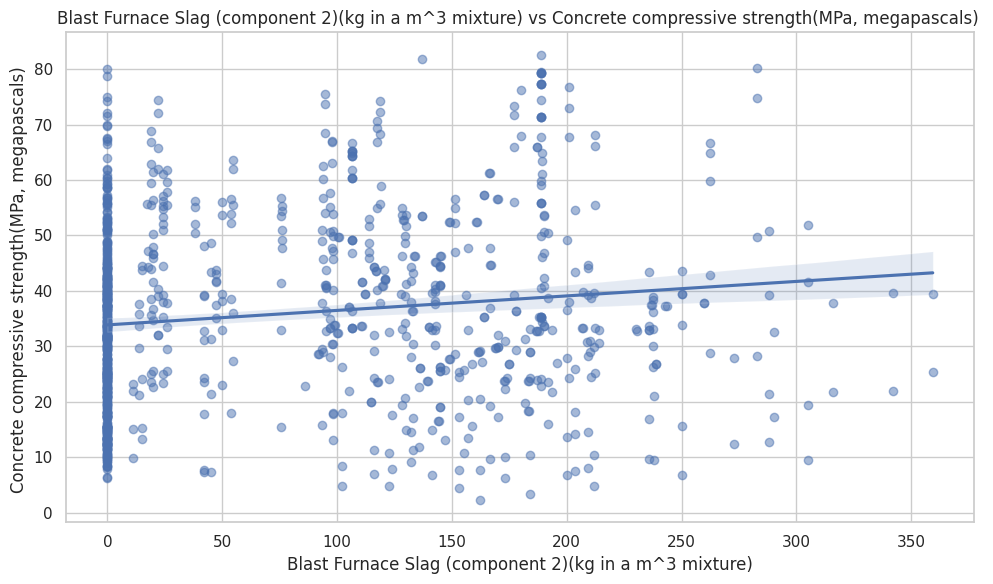

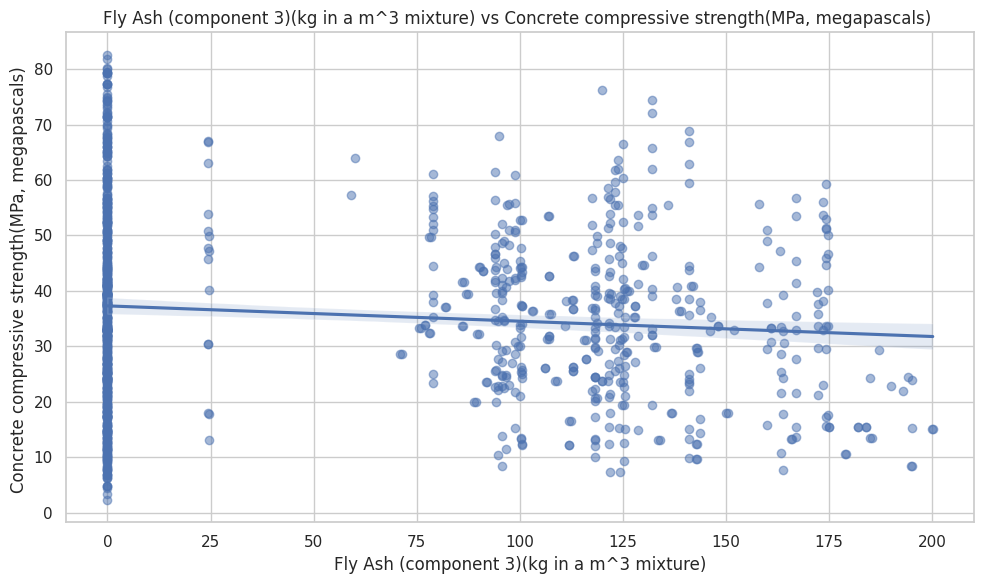

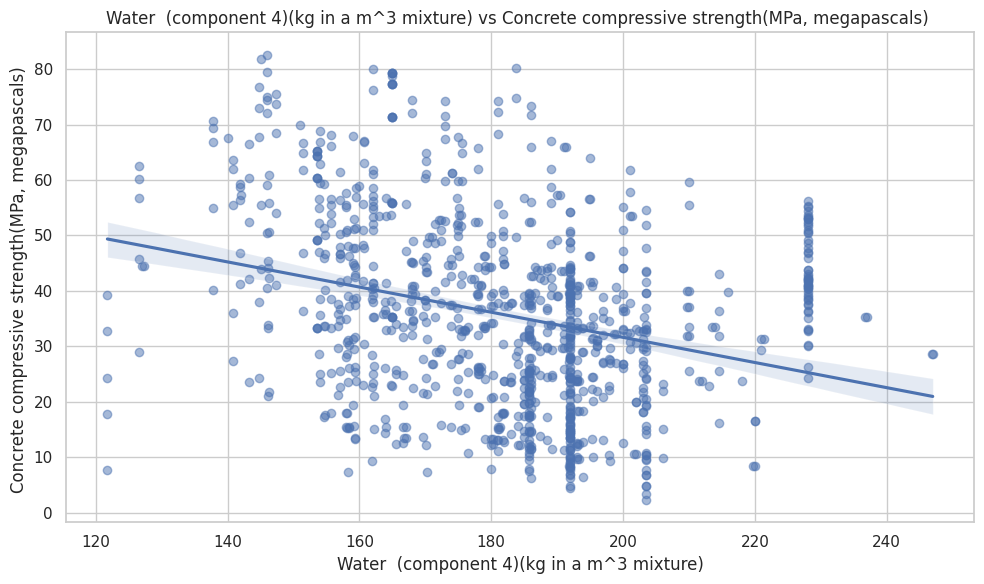

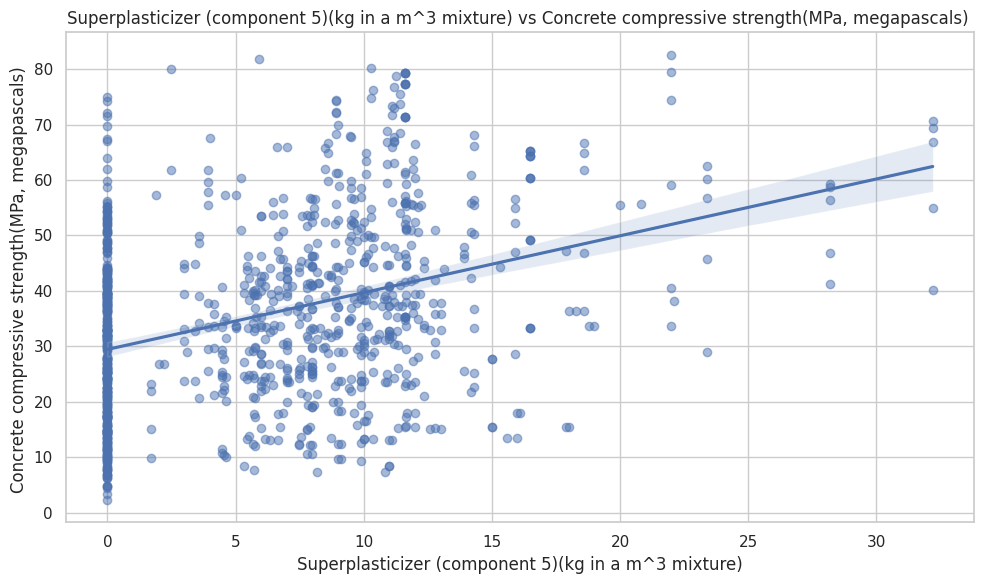

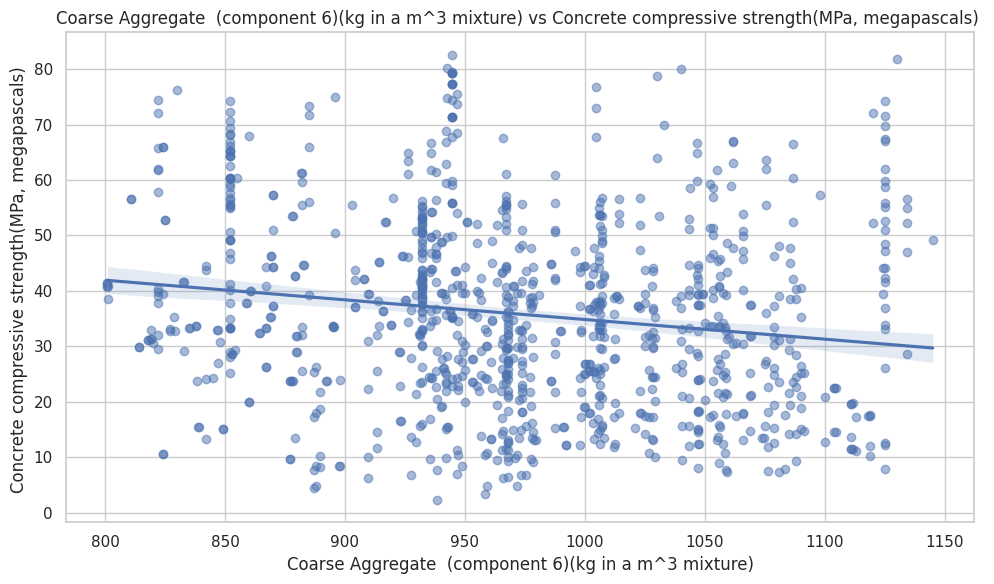

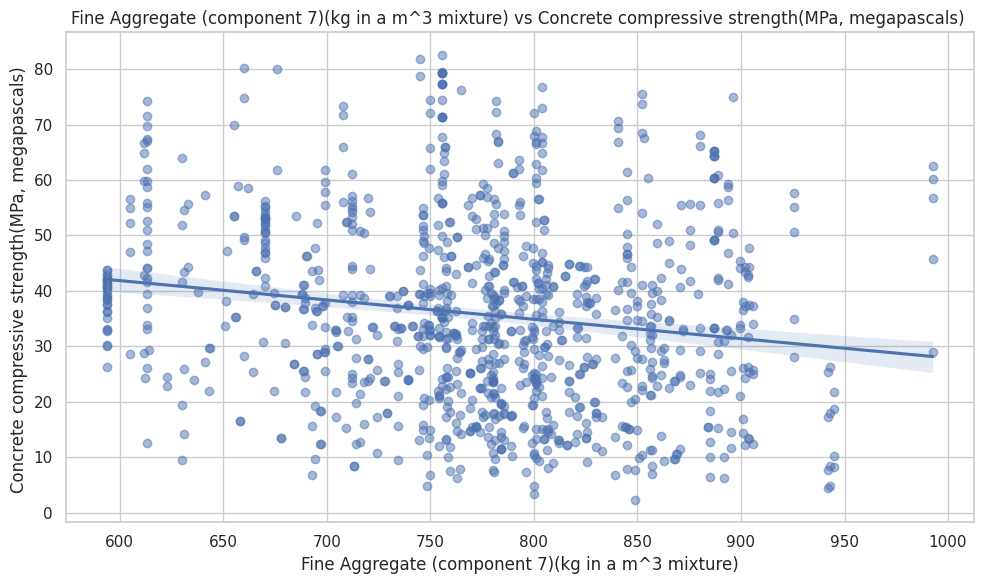

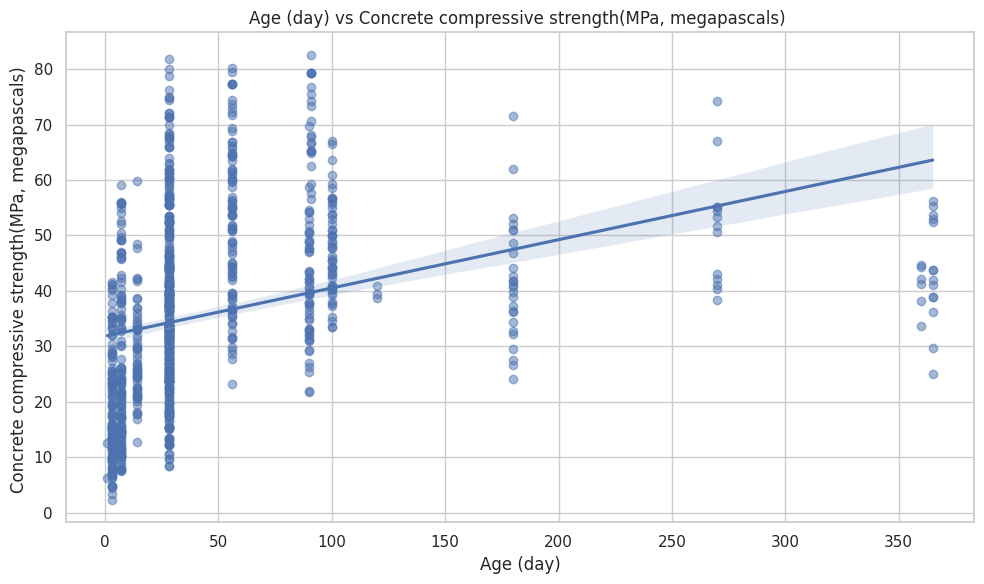

In [40]:
features = [
    "Cement (component 1)(kg in a m^3 mixture)",
    "Blast Furnace Slag (component 2)(kg in a m^3 mixture)",
    "Fly Ash (component 3)(kg in a m^3 mixture)",
    "Water  (component 4)(kg in a m^3 mixture)",
    "Superplasticizer (component 5)(kg in a m^3 mixture)",
    "Coarse Aggregate  (component 6)(kg in a m^3 mixture)",
    "Fine Aggregate (component 7)(kg in a m^3 mixture)",
    "Age (day)"
]

target = "Concrete compressive strength(MPa, megapascals) "

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.regplot(x=df[feature], y=df[target], scatter_kws={'alpha':0.5})
    plt.title(f'{feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## Multivariate Analysis

In [41]:
features = [
    "Cement (component 1)(kg in a m^3 mixture)",
    "Blast Furnace Slag (component 2)(kg in a m^3 mixture)",
    "Fly Ash (component 3)(kg in a m^3 mixture)",
    "Water  (component 4)(kg in a m^3 mixture)",
    "Superplasticizer (component 5)(kg in a m^3 mixture)",
    "Coarse Aggregate  (component 6)(kg in a m^3 mixture)",
    "Fine Aggregate (component 7)(kg in a m^3 mixture)",
    "Age (day)"
]

    Feature Scaling / Normalization

In [42]:
from sklearn.preprocessing import StandardScaler

    Explore the dataset's features and target variable.

In [43]:
X = df[features]
y = df["Concrete compressive strength(MPa, megapascals) "]

    Standardize features

In [44]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Split Data into Train/Test Sets**

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X = df.drop(columns=['Concrete compressive strength(MPa, megapascals) '])
y = df['Concrete compressive strength(MPa, megapascals) ']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [48]:
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (824, 8)
Testing set shape: (206, 8)


**Multivariate Linear Regression**

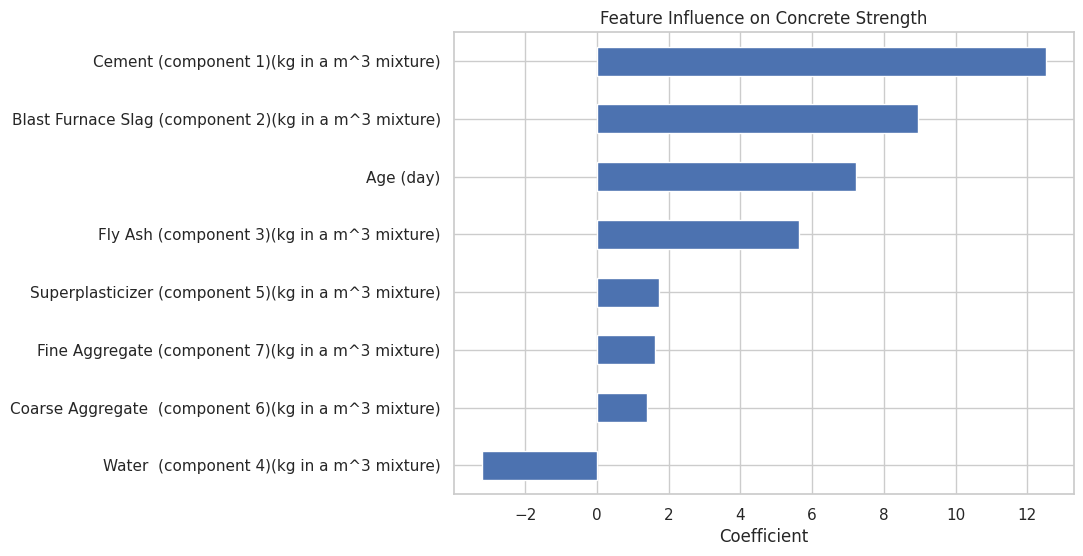

In [49]:
model = LinearRegression()
model.fit(X_scaled, y)

coefs = pd.Series(model.coef_, index=features)
coefs.sort_values().plot(kind='barh', figsize=(8, 6), title="Feature Influence on Concrete Strength")
plt.xlabel("Coefficient")
plt.grid(True)
plt.show()

**PCA (Dimensionality Reduction for Visualization)**

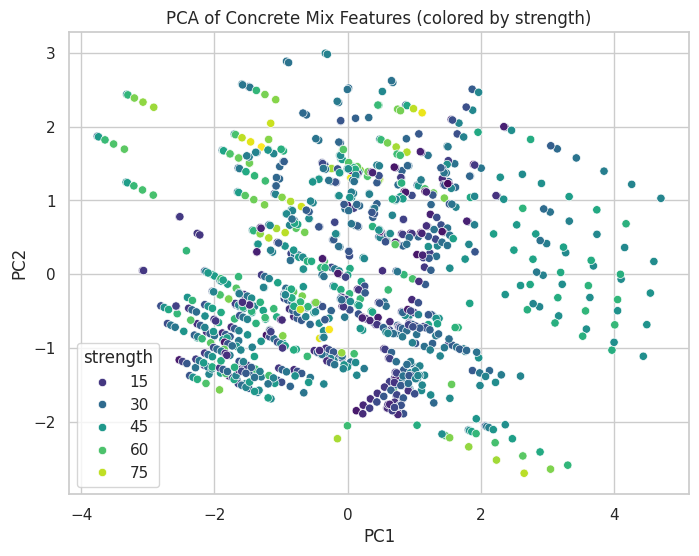

In [50]:
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(components, columns=["PC1", "PC2"])
pca_df["strength"] = y

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="strength", palette="viridis")
plt.title("PCA of Concrete Mix Features (colored by strength)")
plt.show()


**Learning Curve Analysis**

In [51]:
def plot_learning_curve(model, X, y, model_name):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='red', label='Cross-validation score')
    plt.title(f'Learning Curve for {model_name}')
    plt.xlabel('Training Examples')
    plt.ylabel('R² Score')
    plt.legend(loc='best')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

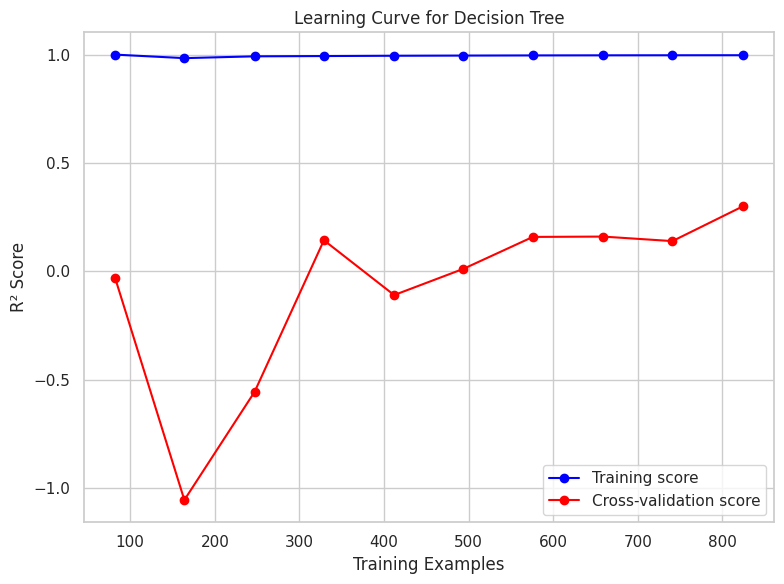

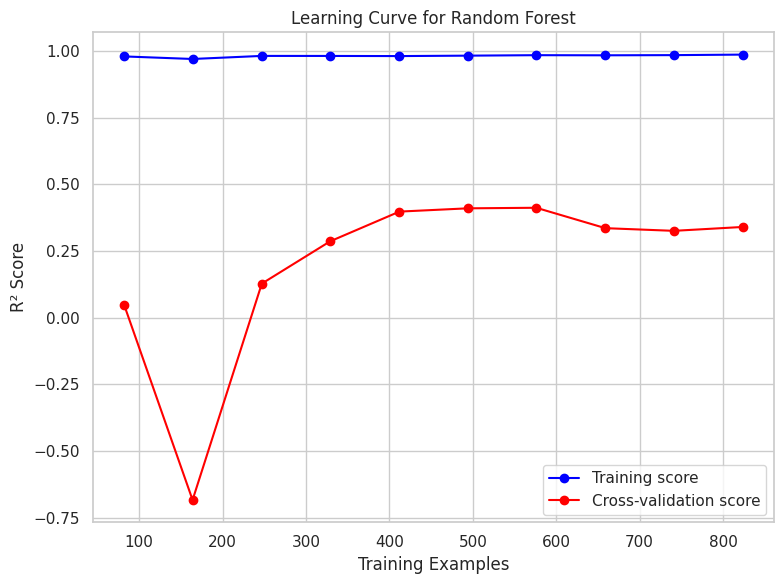

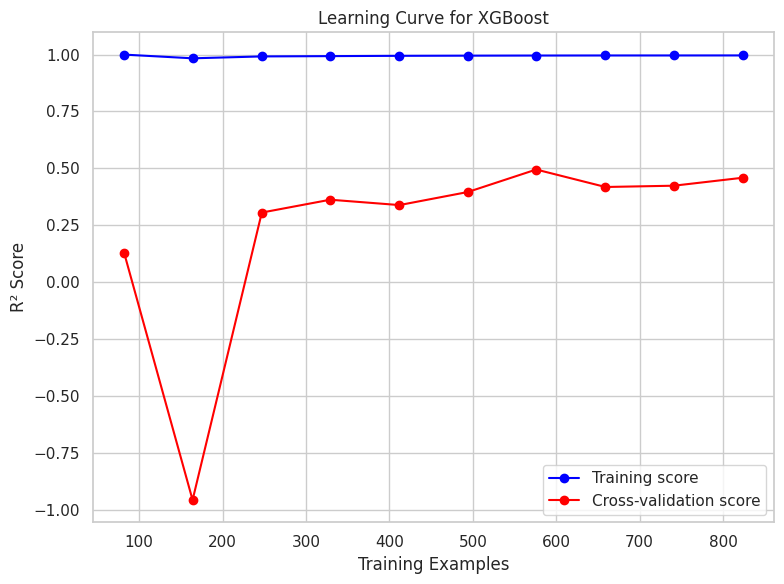

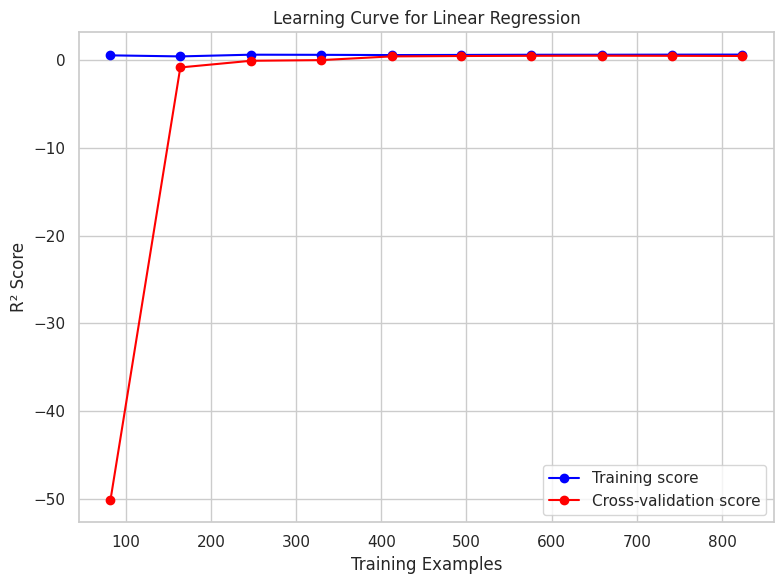

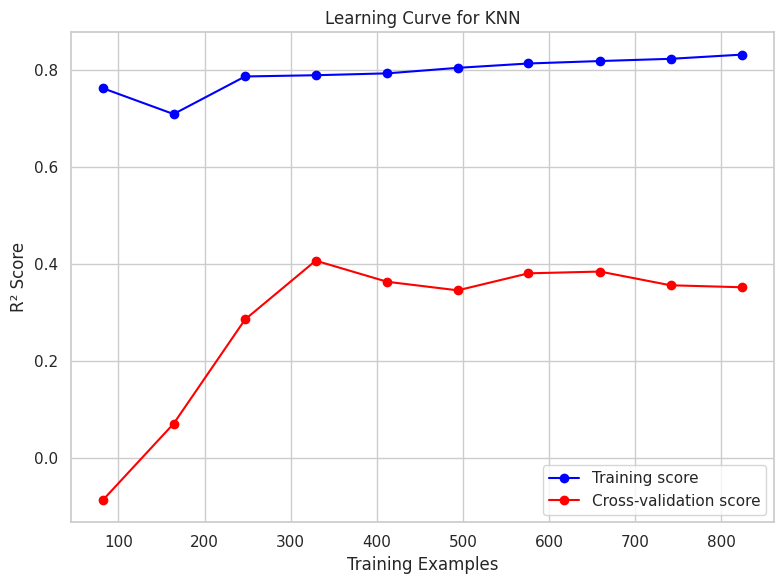

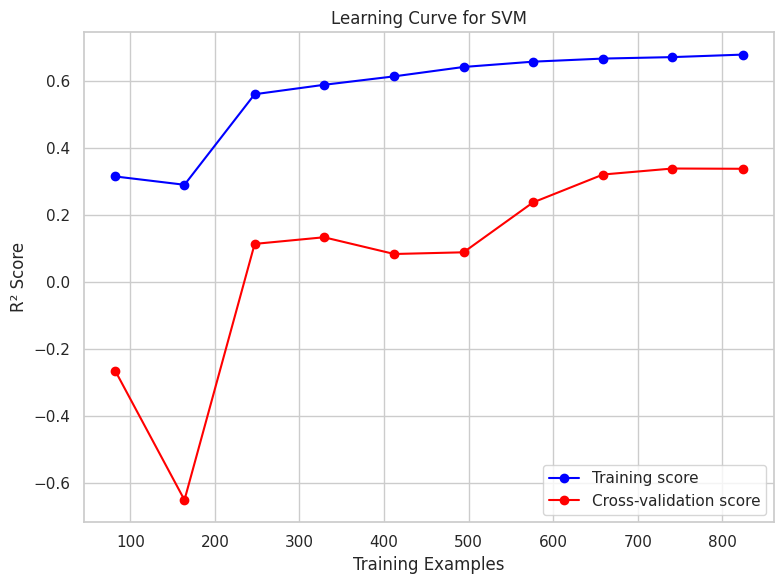

In [52]:
plot_learning_curve(DecisionTreeRegressor(random_state=42), X_scaled, y, 'Decision Tree')
plot_learning_curve(RandomForestRegressor(n_estimators=100, random_state=42), X_scaled, y, 'Random Forest')
plot_learning_curve(XGBRegressor(objective='reg:squarederror', random_state=42), X_scaled, y, 'XGBoost')
plot_learning_curve(LinearRegression(), X_scaled, y, 'Linear Regression')
plot_learning_curve(KNeighborsRegressor(n_neighbors=5), X_scaled, y, 'KNN')
plot_learning_curve(SVR(kernel='rbf'), X_scaled, y, 'SVM')

**Model Complexity Analysis**

In [53]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

def plot_model_complexity(model_class, param_name, param_values, X_train, y_train, model_label, **kwargs):
    train_scores = []
    val_scores = []

    for val in param_values:
        model = model_class(**{param_name: val}, **kwargs)
        model.fit(X_train, y_train)

        train_score = model.score(X_train, y_train)
        val_score = cross_val_score(model, X_train, y_train, cv=5).mean()

        train_scores.append(train_score)
        val_scores.append(val_score)

    plt.plot(param_values, train_scores, label='Train Score', marker='o')
    plt.plot(param_values, val_scores, label='Validation Score', marker='x')
    plt.xlabel(param_name)
    plt.ylabel("R² Score")
    plt.title(f"{model_label} Complexity vs Performance")
    plt.legend()
    plt.grid(True)
    plt.show()

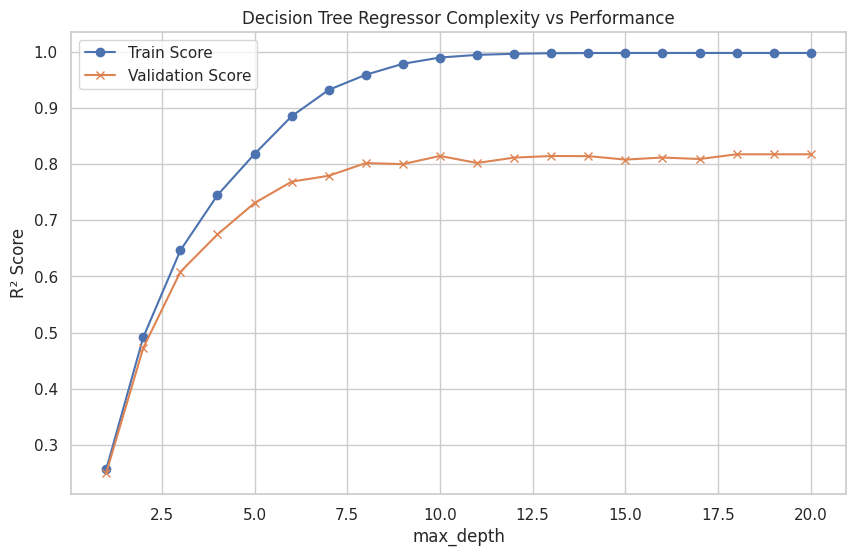

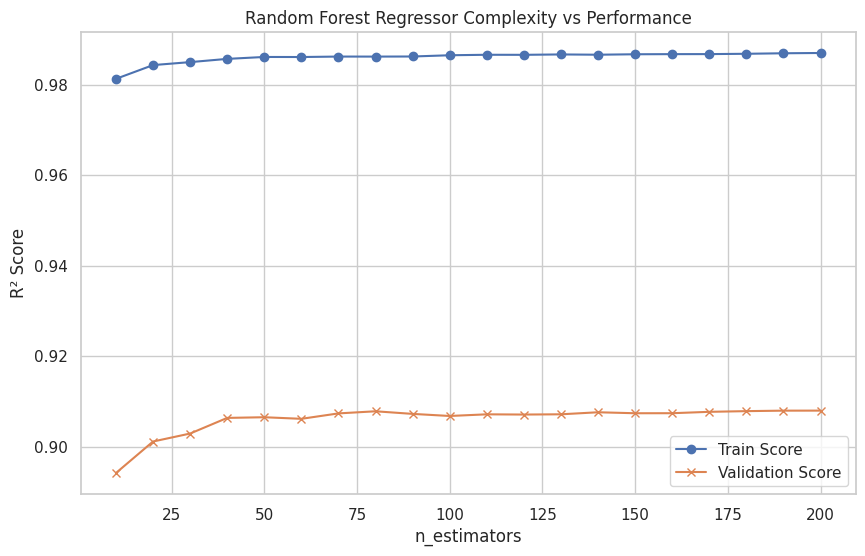

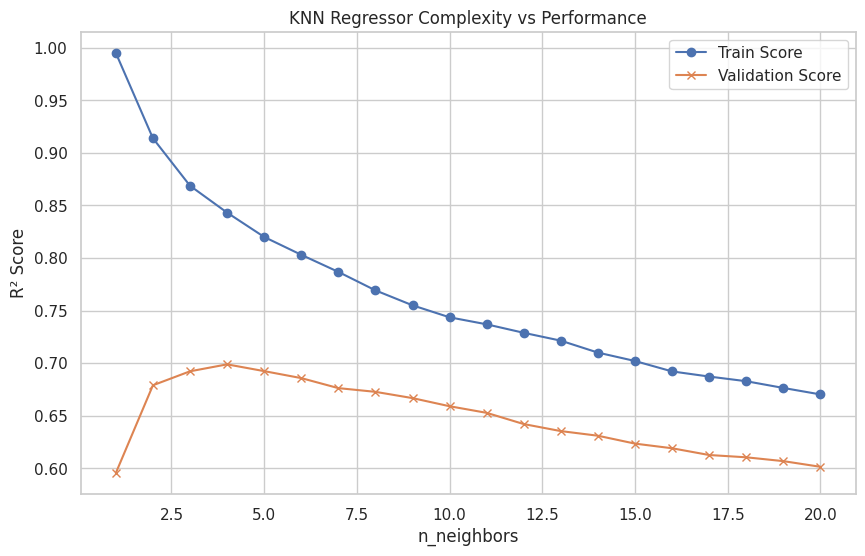

In [54]:
# Decision Tree
plot_model_complexity(
    model_class=DecisionTreeRegressor,
    param_name='max_depth',
    param_values=range(1, 21),
    X_train=X_train,
    y_train=y_train,
    model_label="Decision Tree Regressor",
    random_state=42
)

# Random Forest
plot_model_complexity(
    model_class=RandomForestRegressor,
    param_name='n_estimators',
    param_values=range(10, 201, 10),
    X_train=X_train,
    y_train=y_train,
    model_label="Random Forest Regressor",
    random_state=42
)

# K-Nearest Neighbors
plot_model_complexity(
    model_class=KNeighborsRegressor,
    param_name='n_neighbors',
    param_values=range(1, 21),
    X_train=X_train,
    y_train=y_train,
    model_label="KNN Regressor"
)

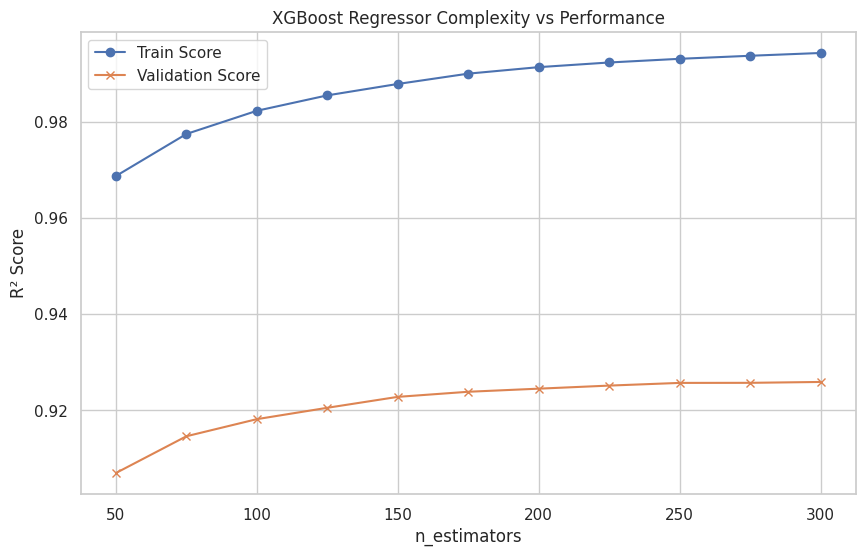

In [55]:
plot_model_complexity(
    model_class=XGBRegressor,
    param_name='n_estimators',
    param_values=range(50, 301, 25),
    X_train=X_train,
    y_train=y_train,
    model_label="XGBoost Regressor",
    max_depth=5,
    learning_rate=0.1,
    objective='reg:squarederror',
    random_state=42,
    verbosity=0
)

# Model training

**Decision Tree**

Mean Absolute Error: 4.5912651509848175
Mean Squared Error: 53.673239708459036
R^2 Score: 0.7917067173788096
Model Train Score: 99.75417004090303
Model Test Score: 79.17067173788097


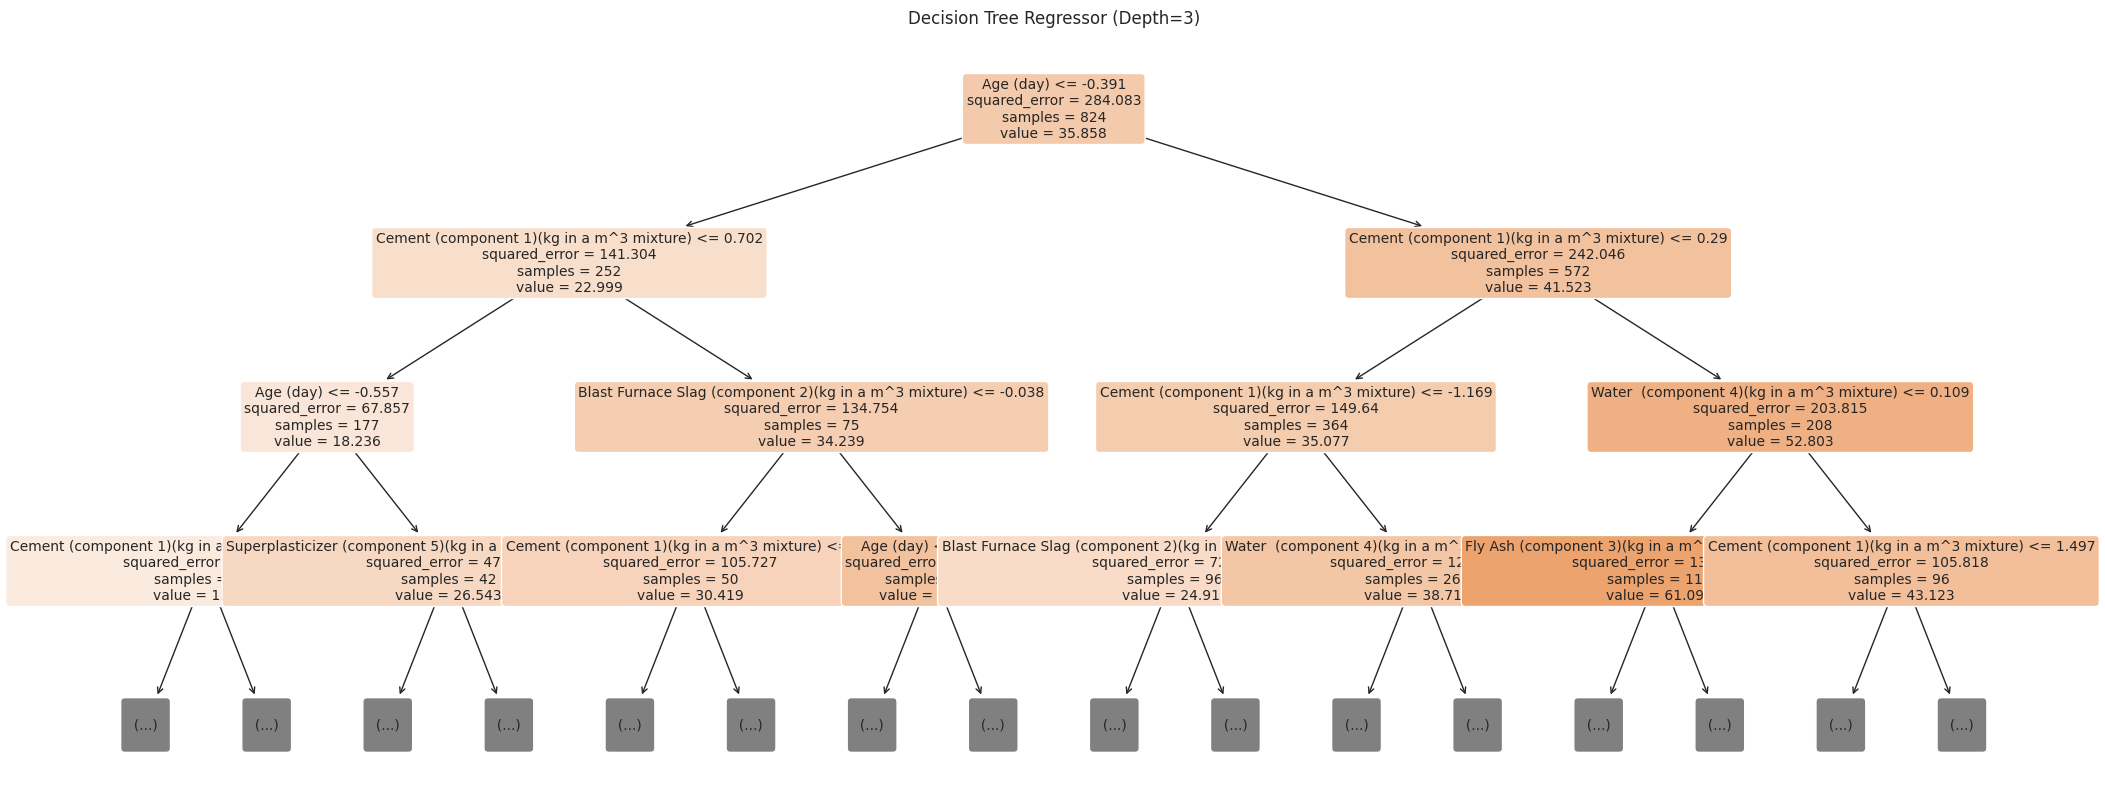

In [56]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))
print(f'Model Train Score: {model.score(X_train, y_train)*100}')
print(f'Model Test Score: {model.score(X_test, y_test)*100}')

plt.figure(figsize=(25, 10))
plot_tree(model, 
          feature_names=X.columns, 
          filled=True, 
          rounded=True, 
          max_depth=3,  
          fontsize=10)
plt.title("Decision Tree Regressor (Depth=3)")
plt.show()

**Random Forest Classifier**

In [57]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [58]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f'R²: {r2:.2f}')
print(f'Model Train Score: {model.score(X_train, y_train)*100}')
print(f'Model Test Score: {model.score(X_test, y_test)*100}')

Mean Squared Error (MSE): 30.4343
Mean Absolute Error (MAE): 3.7613
R²: 0.88
Model Train Score: 98.64672523909252
Model Test Score: 88.18915734676337


**XGBoost**

## Feature Importance Analysis

In [ ]:
# Random Forest for Feature Importance
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Feature Importance (Random Forest):")
print(feature_importance)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')
plt.title('Feature Importance for Predicting Concrete Strength')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## Detailed Target Variable Analysis

In [ ]:
target = 'Concrete compressive strength(MPa, megapascals) '

print("=== Target Variable: Concrete Compressive Strength ===\n")
print("Summary Statistics:")
print(df[target].describe())
print(f"\nSkewness: {skew(df[target]):.3f}")
print(f"Kurtosis: {kurtosis(df[target], fisher=True):.3f}")

# Create strength categories
df['strength_category'] = pd.cut(df[target], 
                                  bins=[0, 20, 35, 50, 100],
                                  labels=['Low (< 20 MPa)', 'Medium (20-35 MPa)', 
                                         'High (35-50 MPa)', 'Very High (> 50 MPa)'])

print("\nStrength Distribution by Category:")
print(df['strength_category'].value_counts().sort_index())

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Histogram with KDE
axes[0, 0].hist(df[target], bins=30, edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df[target].mean(), color='red', linestyle='--', label=f'Mean: {df[target].mean():.2f}')
axes[0, 0].axvline(df[target].median(), color='green', linestyle='--', label=f'Median: {df[target].median():.2f}')
axes[0, 0].set_title('Distribution of Concrete Compressive Strength')
axes[0, 0].set_xlabel('Compressive Strength (MPa)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Box plot
sns.boxplot(y=df[target], ax=axes[0, 1], color='skyblue')
axes[0, 1].set_title('Box Plot of Compressive Strength')
axes[0, 1].set_ylabel('Compressive Strength (MPa)')
axes[0, 1].grid(alpha=0.3)

# Strength by category
df['strength_category'].value_counts().sort_index().plot(kind='bar', ax=axes[1, 0], color='coral')
axes[1, 0].set_title('Count of Samples by Strength Category')
axes[1, 0].set_xlabel('Strength Category')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(alpha=0.3)

# QQ plot for normality check
from scipy import stats
stats.probplot(df[target], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot (Normality Check)')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Drop temporary column
df.drop('strength_category', axis=1, inplace=True)

In [59]:
model = XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [60]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f'R²: {r2:.2f}')
print(f'Model Train Score: {model.score(X_train, y_train)*100}')
print(f'Model Test Score: {model.score(X_test, y_test)*100}')

Mean Squared Error (MSE): 19.8221
Mean Absolute Error (MAE): 2.9068
R²: 0.92
Model Train Score: 99.66963544788567
Model Test Score: 92.30751936264272


**Linear Regression**

In [61]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))
print(f'Model Train Score: {model.score(X_train, y_train)*100}')
print(f'Model Test Score: {model.score(X_test, y_test)*100}')

Mean Absolute Error: 7.745392872421349
Mean Squared Error: 95.97548435337715
R^2 Score: 0.6275416055429017
Model Train Score: 61.04593527939593
Model Test Score: 62.75416055429017


**KNN Regressor**

In [62]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

print("KNN Regressor:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_knn))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_knn))
print("R^2 Score:", r2_score(y_test, y_pred_knn))
print(f'Model Train Score: {model.score(X_train, y_train)*100}')
print(f'Model Test Score: {model.score(X_test, y_test)*100}')

KNN Regressor:
Mean Absolute Error: 6.856961032385598
Mean Squared Error: 74.32510819513091
R^2 Score: 0.7115616487614582
Model Train Score: 61.04593527939593
Model Test Score: 62.75416055429017


**SVM Regressor**

In [63]:
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print("SVM Regressor:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_svm))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_svm))
print("R^2 Score:", r2_score(y_test, y_pred_svm))
print(f'Model Train Score: {model.score(X_train, y_train)*100}')
print(f'Model Test Score: {model.score(X_test, y_test)*100}')

SVM Regressor:
Mean Absolute Error: 7.566768476725256
Mean Squared Error: 90.70615071267711
R^2 Score: 0.64799065626556
Model Train Score: 61.04593527939593
Model Test Score: 62.75416055429017


# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import time

## Random Forest Hyperparameter Tuning

In [ ]:
# Random Forest Hyperparameter Tuning
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

print("Starting Random Forest Hyperparameter Tuning...")
start_time = time.time()

rf_random_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=rf_param_grid,
    n_iter=20,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

rf_random_search.fit(X_train, y_train)

print(f"\nTuning completed in {time.time() - start_time:.2f} seconds")
print(f"Best parameters: {rf_random_search.best_params_}")
print(f"Best cross-validation R² score: {rf_random_search.best_score_:.4f}")

# Evaluate on test set
rf_best = rf_random_search.best_estimator_
y_pred_rf_tuned = rf_best.predict(X_test)

print("\nTest Set Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf_tuned):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf_tuned):.4f}")
print(f"R²: {r2_score(y_test, y_pred_rf_tuned):.4f}")
print(f"Train Score: {rf_best.score(X_train, y_train)*100:.2f}%")
print(f"Test Score: {rf_best.score(X_test, y_test)*100:.2f}%")

## XGBoost Hyperparameter Tuning

In [ ]:
# XGBoost Hyperparameter Tuning
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'min_child_weight': [1, 3, 5]
}

print("Starting XGBoost Hyperparameter Tuning...")
start_time = time.time()

xgb_random_search = RandomizedSearchCV(
    XGBRegressor(objective='reg:squarederror', random_state=42, verbosity=0),
    param_distributions=xgb_param_grid,
    n_iter=30,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

xgb_random_search.fit(X_train, y_train)

print(f"\nTuning completed in {time.time() - start_time:.2f} seconds")
print(f"Best parameters: {xgb_random_search.best_params_}")
print(f"Best cross-validation R² score: {xgb_random_search.best_score_:.4f}")

# Evaluate on test set
xgb_best = xgb_random_search.best_estimator_
y_pred_xgb_tuned = xgb_best.predict(X_test)

print("\nTest Set Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_xgb_tuned):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_xgb_tuned):.4f}")
print(f"R²: {r2_score(y_test, y_pred_xgb_tuned):.4f}")
print(f"Train Score: {xgb_best.score(X_train, y_train)*100:.2f}%")
print(f"Test Score: {xgb_best.score(X_test, y_test)*100:.2f}%")

## Model Comparison and Best Model Selection

In [ ]:
# Compare all models
models_comparison = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest (Base)', 'Random Forest (Tuned)', 
              'XGBoost (Base)', 'XGBoost (Tuned)', 'KNN', 'SVM'],
    'R² Score': [],
    'MAE': [],
    'MSE': []
}

# Train all models and collect metrics
all_models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest (Base)', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('Random Forest (Tuned)', rf_best),
    ('XGBoost (Base)', XGBRegressor(objective='reg:squarederror', random_state=42, verbosity=0)),
    ('XGBoost (Tuned)', xgb_best),
    ('KNN', KNeighborsRegressor(n_neighbors=5)),
    ('SVM', SVR(kernel='rbf'))
]

for name, model in all_models:
    if 'Tuned' not in name:
        model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    models_comparison['R² Score'].append(r2_score(y_test, y_pred))
    models_comparison['MAE'].append(mean_absolute_error(y_test, y_pred))
    models_comparison['MSE'].append(mean_squared_error(y_test, y_pred))

# Create comparison dataframe
comparison_df = pd.DataFrame(models_comparison)
comparison_df = comparison_df.sort_values('R² Score', ascending=False)

print("Model Performance Comparison:")
print(comparison_df.to_string(index=False))

# Visualize comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# R² Score comparison
axes[0].barh(comparison_df['Model'], comparison_df['R² Score'], color='steelblue')
axes[0].set_xlabel('R² Score')
axes[0].set_title('Model Comparison: R² Score')
axes[0].grid(alpha=0.3)

# MAE comparison
axes[1].barh(comparison_df['Model'], comparison_df['MAE'], color='coral')
axes[1].set_xlabel('Mean Absolute Error')
axes[1].set_title('Model Comparison: MAE (Lower is Better)')
axes[1].grid(alpha=0.3)

# MSE comparison
axes[2].barh(comparison_df['Model'], comparison_df['MSE'], color='lightgreen')
axes[2].set_xlabel('Mean Squared Error')
axes[2].set_title('Model Comparison: MSE (Lower is Better)')
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Select best model
best_model_name = comparison_df.iloc[0]['Model']
best_model_r2 = comparison_df.iloc[0]['R² Score']
print(f"\n{'='*60}")
print(f"BEST MODEL: {best_model_name}")
print(f"R² Score: {best_model_r2:.4f}")
print(f"{'='*60}")

## Save Best Model and Scaler

In [ ]:
import pickle
import os

# Create models directory if it doesn't exist
os.makedirs('models', exist_ok=True)

# Save the best model (XGBoost)
with open('models/best_model.pkl', 'wb') as f:
    pickle.dump(xgb_best, f)

# Save the scaler
with open('models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save feature names
with open('models/feature_names.pkl', 'wb') as f:
    pickle.dump(list(X.columns), f)

print("Model artifacts saved successfully!")
print("- models/best_model.pkl")
print("- models/scaler.pkl")
print("- models/feature_names.pkl")